In [4]:
#Installation des packages
!pip install pandas
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install seaborn
!pip install missingno

In [5]:
#Importer les librairies Python nécessaires pour le projet
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import missingno as msno

#Versions 
print('Version des librairies utilisées :')
print('Pandas : ' + pd.__version__)
print('NumPy : ' + np.__version__)
print('Matplotlib : ' + mpl.__version__)
print('Seaborn : ' + sns.__version__)
print('Missingno : ' + msno.__version__)

Version des librairies utilisées :
Pandas : 2.1.1
NumPy : 1.26.0
Matplotlib : 3.7.1
Seaborn : 0.12.2
Missingno : 0.5.2


## Enoncé
Vous êtes Data Scientist dans une start-up de la EdTech, nommée **Academy**, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d'expansion à l'international de l'entreprise. Il vous confie une première mission d'analyse exploratoire, pour déterminer si les données sur l'éducation de la banque mondiale permettent d'informer le projet d'expansion. Mark aimerait explorer les pays avec un fort potentiel de clients pour les services de academy, et comment ce potentiel pourrait évoluer.

## Mission

Réaliser une analyse pré exploratoire de ce [**jeu de données**](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives/Projet+Python_Dataset_Edstats_csv.zip). Pour cette mission, on vous demande de déterminer les pays avec un fort potentiel de clients pour les services d'Academy et comment ce potentiel pourrait évoluer. Ce travail doit permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays

# Exercice

## 1 - Inspection des données et de la qualité des données

### _1.1 - EdStatsCountry.csv_

In [6]:
#Charger le fichier EdStatsCountry.csv 
df = pd.read_csv('EdStatsCountry.csv', sep = ',')

In [7]:
#Afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées
df.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,...,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2012.0,2000,NaN
8,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2012",Yes,2013/14,NaN,2012.0,2007,NaN
9,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN,NaN


In [8]:
#Combien de lignes et de colonnes sont contenus dans df ?
df.shape

(241, 32)

In [9]:
#Affichons le nom des colonnes, le type des colonnes et le nombre de valeurs par colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

<Axes: >

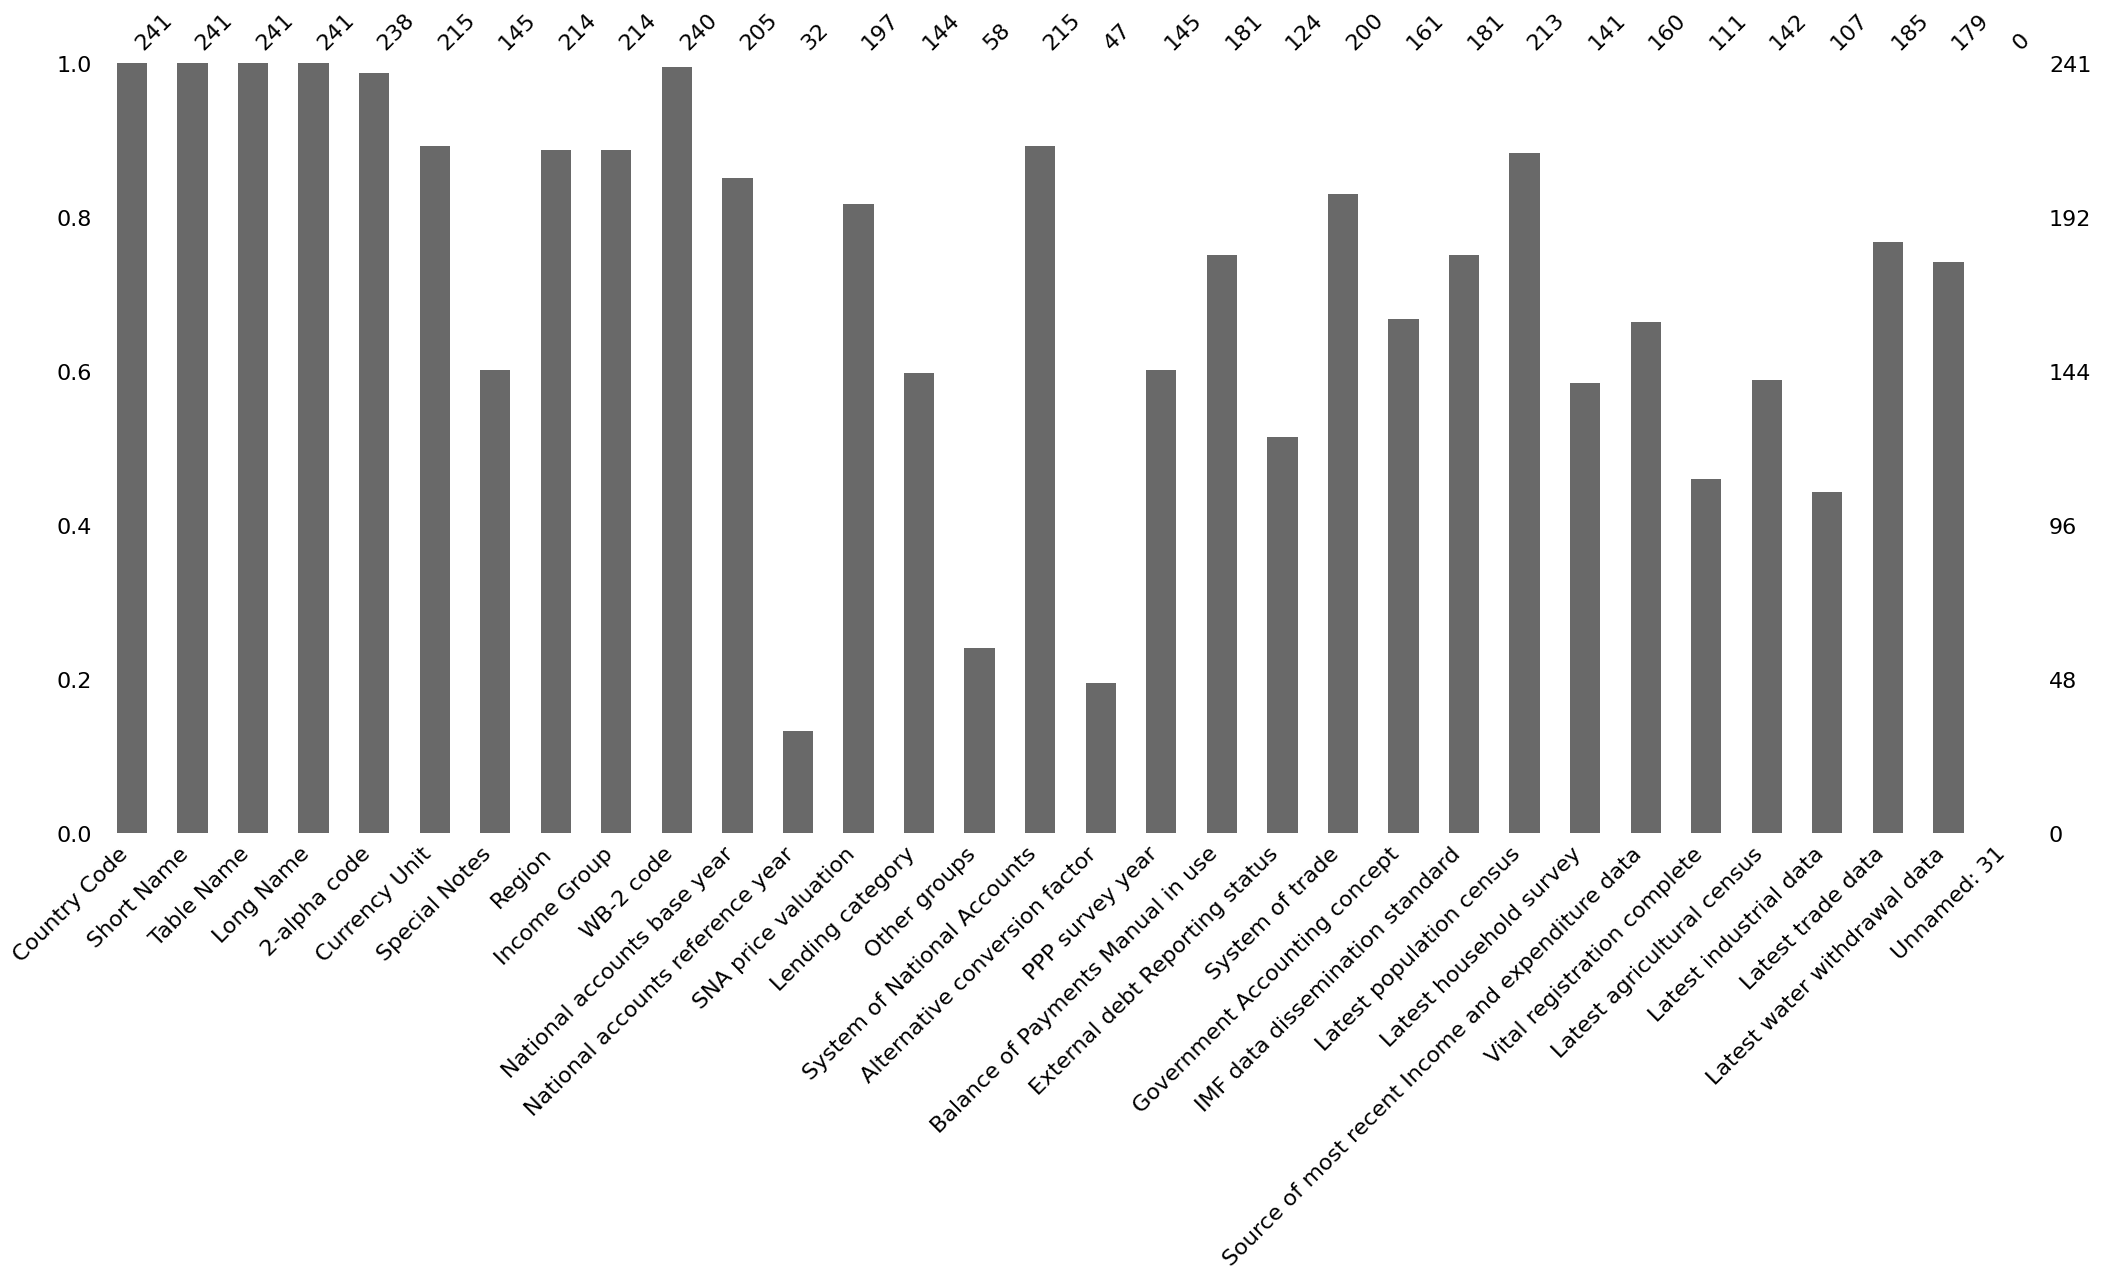

In [10]:
#Existe-t-il des valeurs manquantes dans ce jeu de données ?
display(df.isna().mean())
msno.bar(df)

In [11]:
#Existe-t-il des doublons pour la variable 'Country Code' qui est un identifiant unique ?
df.duplicated('Country Code').sum()

0

In [12]:
#Suppression des colonnes inutiles à notre analyse
df = df.drop(['2-alpha code', 'Currency Unit', 'Special Notes', 'WB-2 code', 'National accounts base year', 'National accounts reference year',
              'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 
              'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use',
              'External debt Reporting status', 'System of trade', 'Government Accounting concept', 
              'IMF data dissemination standard', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete',
              'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31'], axis = 1)


In [13]:
# La colonne "Latest population census" contient des valeurs string, ce qui empêche la conversion en entier. 
df.loc[((df['Latest population census'] == '2011. Population figures compiled from administrative registers.') | (df['Latest population census'] == '2011. The population censuses for 1986 and 1996 were based on a one-in-seven sample of the population, while that for 2006 was based on a one-in-ten sample of the population.')), 'Latest population census'] = 2011
df.loc[df['Latest population census'] == 'Guernsey: 2009; Jersey: 2011.', 'Latest population census'] = np.nan
df.loc[df['Latest population census'] == '2006. Rolling census based on continuous sample survey.', 'Latest population census'] = 2006
df['Latest population census'] = pd.to_numeric(df["Latest population census"]).astype('Int64')
df['Latest population census'].unique()

<IntegerArray>
[2010, 1979, 1970, 2011, <NA>, 2009, 2008, 2013, 2006, 2012, 2005, 2003, 1998,
 1984, 2007, 2002, 1996, 1997, 2004, 1993, 1983, 1987, 2001, 1989]
Length: 24, dtype: Int64

In [14]:
#Des groupes de pays apparaissent dans les colonnes pays comme 'Short Name'. Nous les supprimons.
#La colone 'Latest population census' fournit le dernier recensement de population pour les pays seulement.
filtre_short_name = df[df['Latest population census'].notna()]['Short Name'].unique()

#Afficher les lignes devant être supprimées
print("Lignes à supprimer :")
print(df[~df['Short Name'].isin(filtre_short_name)])

# Filtre du dataframe
df = df[df['Short Name'].isin(filtre_short_name)]
df.info()

Lignes à supprimer :
    Country Code                                      Short Name  \
5            ARB                                      Arab World   
35           CHI                                 Channel Islands   
47           CUW                                         Curaçao   
57           EAP           East Asia & Pacific (developing only)   
58           EAS         East Asia & Pacific (all income levels)   
59           ECA         Europe & Central Asia (developing only)   
60           ECS       Europe & Central Asia (all income levels)   
63           EMU                                       Euro area   
68           EUU                                  European Union   
89           HIC                                     High income   
92           HPC          Heavily indebted poor countries (HIPC)   
116          LAC     Latin America & Caribbean (developing only)   
122          LCN   Latin America & Caribbean (all income levels)   
123          LDC    Least d

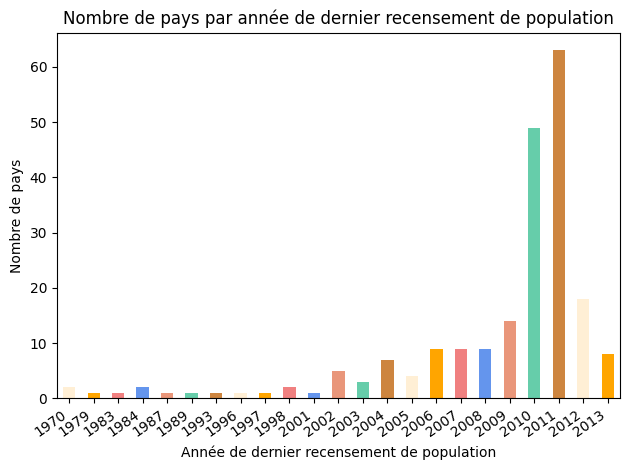

,count,mean,std,min,25%,50%,75%,max
Latest population census,212.0,2008.084906,6.442775,1970.0,2008.0,2010.0,2011.0,2013.0


In [15]:
# Quelles sont les années de dernier recensement avec le moins de données manquantes et les plus récentes ?
# Représentation graphique
color = ['papayawhip', 'orange','lightcoral', 'cornflowerblue', 'darksalmon', 'mediumaquamarine', 'peru']
plt.figure()
df['Latest population census'].value_counts().sort_index().plot(kind='bar', color=color)
plt.title('Nombre de pays par année de dernier recensement de population')
plt.xlabel('Année de dernier recensement de population')
plt.ylabel('Nombre de pays')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

df.describe().T

In [16]:
#Suppression des pays dont la colonne 'Latest population census' est antérieure à 2008
latest_census_a_supp = df[df['Latest population census']<2008]
print('Lignes à supprimer')
print(latest_census_a_supp)

df=df[df['Latest population census'] >= 2008]

Lignes à supprimer
    Country Code                Short Name                Table Name  \
1            AFG               Afghanistan               Afghanistan   
2            AGO                    Angola                    Angola   
17           BFA              Burkina Faso              Burkina Faso   
30           BTN                    Bhutan                    Bhutan   
32           CAF  Central African Republic  Central African Republic   
38           CIV             Côte d'Ivoire             Côte d'Ivoire   
39           CMR                  Cameroon                  Cameroon   
40           COD           Dem. Rep. Congo          Congo, Dem. Rep.   
41           COG                     Congo               Congo, Rep.   
42           COL                  Colombia                  Colombia   
43           COM                   Comoros                   Comoros   
62           EGY                     Egypt          Egypt, Arab Rep.   
64           ERI                   Eritrea   

In [17]:
#Afficher les valeurs uniques de la colonne 'Income Group'
print(df['Income Group'].unique())

#Remplacer 'High income: nonOECD' et 'High income: OECD' par 'High income'
for income_group in df['Income Group']:
    if income_group == 'High income: nonOECD':
        df.loc[df['Income Group'] == income_group, 'Income Group'] = 'High income'
    elif income_group == 'High income: OECD':
        df.loc[df['Income Group'] == income_group, 'Income Group'] = 'High income'

print(df['Income Group'].unique())

['High income: nonOECD' 'Upper middle income' 'Lower middle income'
 'High income: OECD' 'Low income' nan]
['High income' 'Upper middle income' 'Lower middle income' 'Low income'
 nan]


Le nombre de pays restant dans ce fichier est :  161
Représentation graphique de la répartition des pays par région :


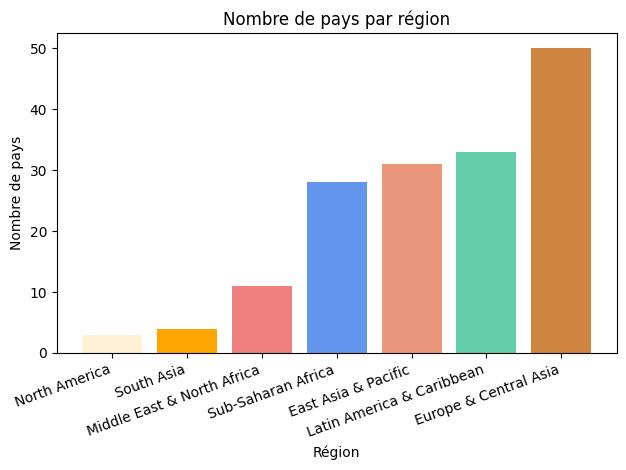

,Region,Country Code
4,North America,3
5,South Asia,4
3,Middle East & North Africa,11
6,Sub-Saharan Africa,28
0,East Asia & Pacific,31
2,Latin America & Caribbean,33
1,Europe & Central Asia,50


In [18]:
#Combien de pays reste-t-il dans ce fichier ?
print('Le nombre de pays restant dans ce fichier est : ', df['Country Code'].count())

#Représentation graphique du nombre de pays par région 
print('Représentation graphique de la répartition des pays par région :')
pays_par_region = df.groupby('Region')['Country Code'].count().reset_index().sort_values(by='Country Code')

plt.figure()
plt.bar(pays_par_region['Region'], pays_par_region['Country Code'], color=color)
plt.title('Nombre de pays par région')
plt.xlabel('Région')
plt.ylabel('Nombre de pays')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

display(pays_par_region)

Voici une représentation graphique de la répartition des pays par revenu :


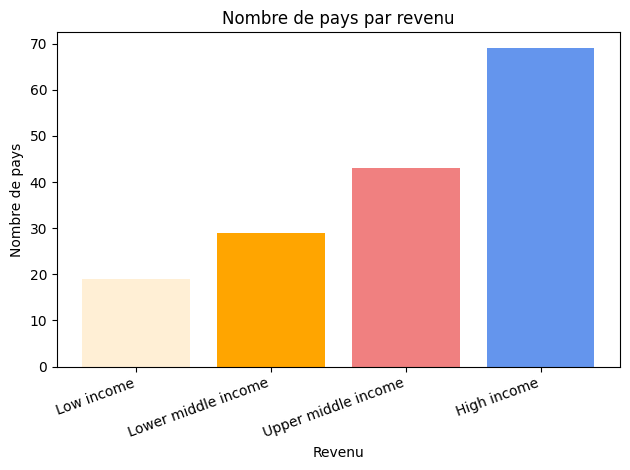

In [19]:
#Nombre de pays par 'Income Group'
print('Voici une représentation graphique de la répartition des pays par revenu :')
pays_par_revenus = df.groupby('Income Group')['Country Code'].count().reset_index().sort_values(by='Country Code')

#Représentation graphique du nombre de pays par catégorie de revenu
plt.figure()
plt.bar(pays_par_revenus['Income Group'], pays_par_revenus['Country Code'], color=color)
plt.title('Nombre de pays par revenu')
plt.xlabel('Revenu')
plt.ylabel('Nombre de pays')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

Représentation graphique de la répartition des pays par revenu et par région :


<Figure size 640x480 with 0 Axes>

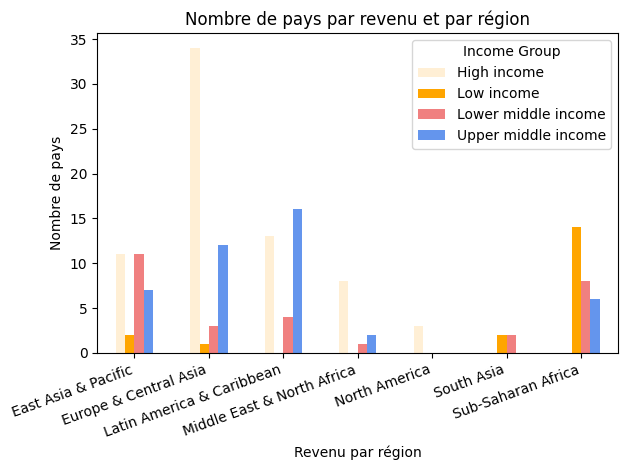

In [20]:
#Nombre de pays par 'Income Group' par 'Region'
print('Représentation graphique de la répartition des pays par revenu et par région :')

#Représentation graphique de la répartition des pays par revenu et par région
pays_par_revenu_par_region = df.groupby(['Region', 'Income Group'])['Country Code'].count().unstack()

plt.figure()
pays_par_revenu_par_region.plot(kind='bar', color=color)
plt.title('Nombre de pays par revenu et par région')
plt.xlabel('Revenu par région')
plt.ylabel('Nombre de pays')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

In [21]:
#Suppression des pays avec un revenu trop faible
pays_low_income = df[(df['Income Group'] == ('Low income'))|(df['Income Group'] == ('Lower middle income'))]

print("Pays à supprimer :")
print(pays_low_income['Short Name'].unique())

#Suppression
df = df[(df['Income Group'] != ('Low income'))&(df['Income Group'] != ('Lower middle income'))]
print('Il reste au total ' + str(df['Country Code'].nunique()) + ' pays.')

Pays à supprimer :
['Armenia' 'Burundi' 'Benin' 'Bangladesh' 'Bolivia' 'Cabo Verde'
 'Djibouti' 'Micronesia' 'Ghana' 'The Gambia' 'Guinea-Bissau' 'Guyana'
 'Honduras' 'Indonesia' 'India' 'Kenya' 'Kyrgyz Republic' 'Cambodia'
 'Kiribati' 'Liberia' 'Sri Lanka' 'Mali' 'Mongolia' 'Mauritania' 'Malawi'
 'Niger' 'Nepal' 'Philippines' 'Papua New Guinea'
 "Dem. People's Rep. Korea" 'Paraguay' 'Rwanda' 'Sudan' 'Senegal'
 'Solomon Islands' 'South Sudan' 'São Tomé and Principe' 'Chad' 'Togo'
 'Tajikistan' 'Timor-Leste' 'Tanzania' 'Vietnam' 'Vanuatu' 'Samoa'
 'Kosovo' 'Zambia' 'Zimbabwe']
Il reste au total 113 pays.


### **Résumé** : 
- Le jeu de données comporte 241 lignes et 32 colonnes.
- Il comporte des données manquantes mais aucun doublon.
- Les groupes de pays étant considérées comme des pays ont été supprimées de la liste.
- 'Latest population census' met en évidence que la grande majorité des pays ont eu un dernier recensement de population entre 2008 et 2013, on supprime donc tous les pays ayant un recensement de population antérieur.
- Les pays avec un revenu faible ou moyen faible ont été supprimée.
- Après application de ces filtres, on passe de 241 à 113 pays pour notre analyse.
- Ce jeu de données apporte des informations sur les pays, les régions du monde auxquelles ils appartiennent ainsi que le niveau de revenu de ces pays.
- Ce jeu de données fournit également des informations sur les années de collecte de données de divers indicateurs sur ces pays. Ainsi, ce jeu de données apporte des informations utiles pour notre analyse.

### _1.2 EdStatsCountry-Serie.csv_

In [22]:
#Charger le fichier EdStatsCountry-Serie.csv
df_country_serie = pd.read_csv('EdStatsCountry-Series.csv', sep = ',')

In [23]:
#Afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées
df_country_serie.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [24]:
#Combien de lignes et de colonnes sont contenues dans df_country_serie ?
df_country_serie.shape

(613, 4)

In [25]:
#Afficher le nom des colonnes, le type des colonnes et le nombre de valeurs par colonne
df_country_serie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

La colonne 'unnamed: 3' ne contient pas de donnée. Elle est supprimée


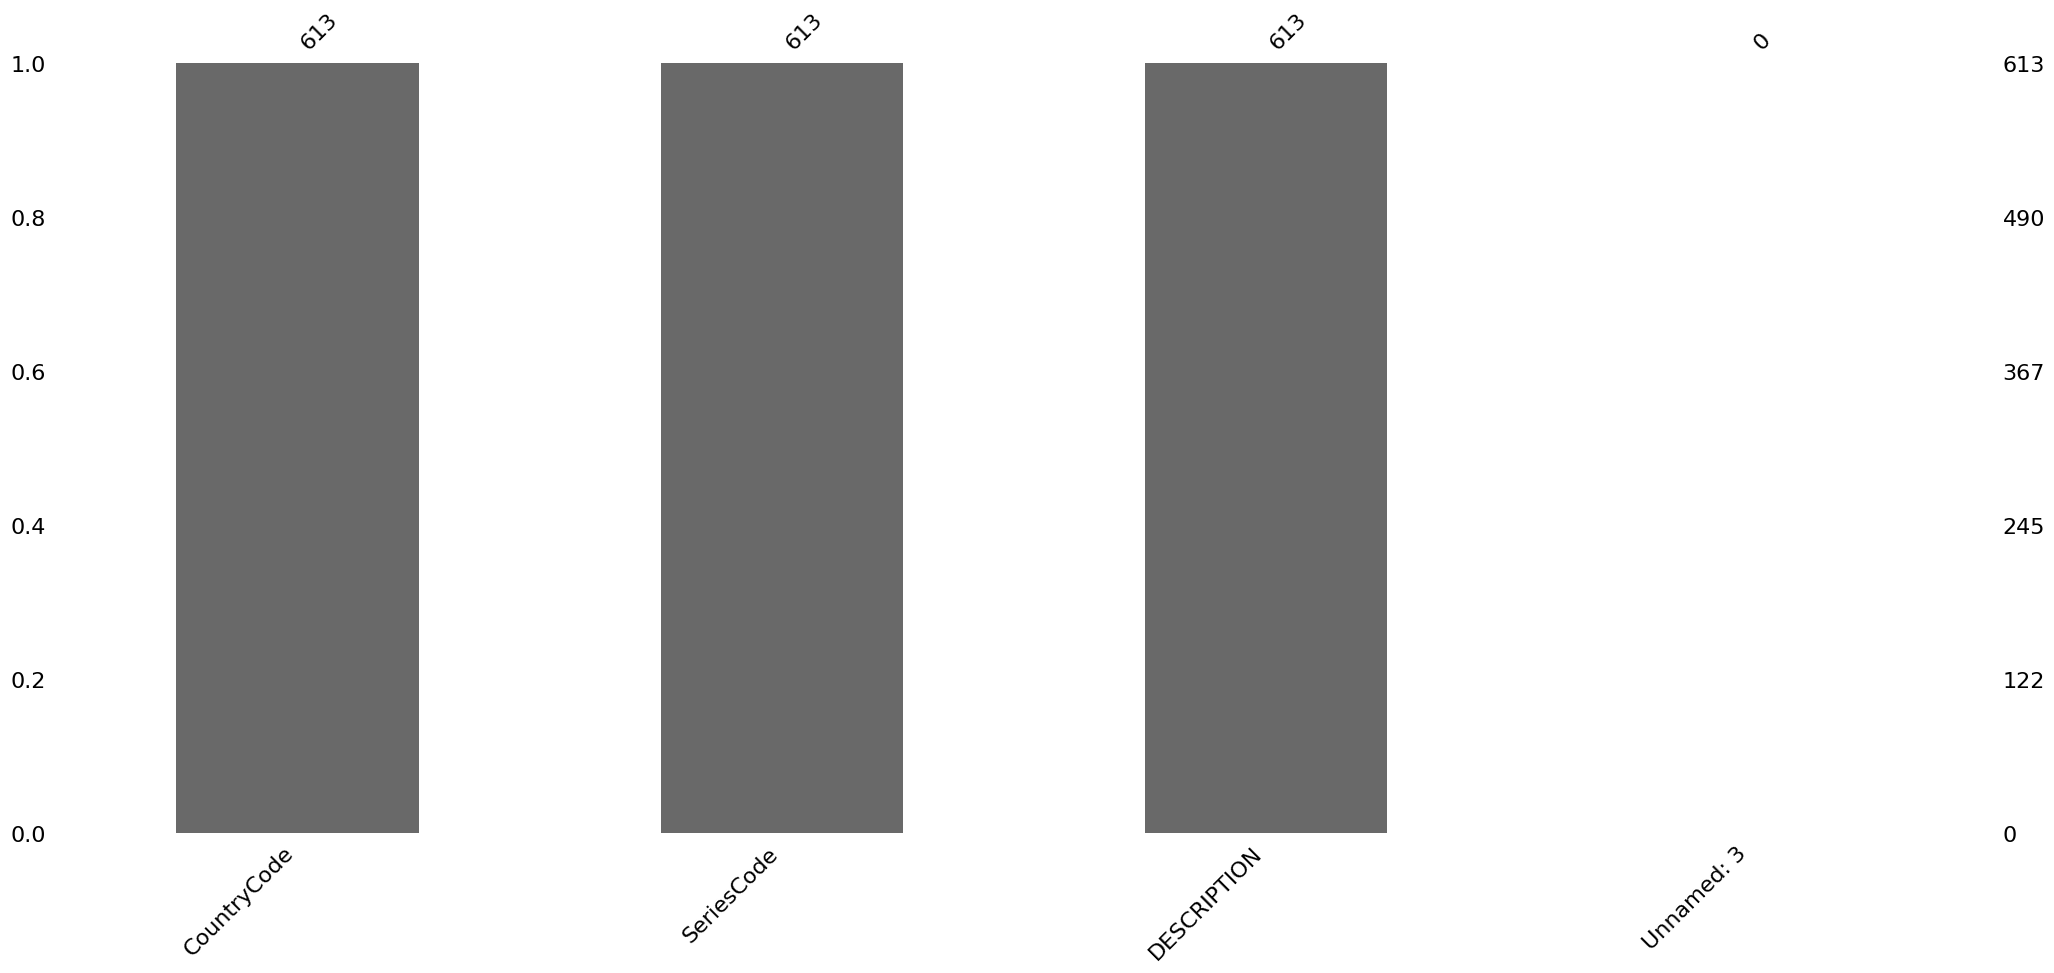

In [26]:
#Existe-t-il des valeurs manquantes dans ce jeu de données ?
display(df_country_serie.isna().mean())
msno.bar(df_country_serie)

#Suppression colonne vide
print('La colonne \'unnamed: 3\' ne contient pas de donnée. Elle est supprimée')
df_country_serie = df_country_serie.drop(['Unnamed: 3'], axis=1)

In [27]:
#Existe-t-il des doublons pour la variable 'CountryCode' et 'SeriesCode'
df_country_serie.duplicated(['CountryCode', 'SeriesCode']).sum()

0

In [28]:
#Quelles sont les descriptions majoritaires ?
df_country_serie['DESCRIPTION'].value_counts()

DESCRIPTION
Data sources : United Nations World Population Prospects                                                                                     154
Data sources: United Nations World Population Prospects                                                                                      137
Estimates are based on regression.                                                                                                            84
Data sources : Eurostat                                                                                                                       54
Derived using ratio of age group from WPP and World Bank population.                                                                          24
                                                                                                                                            ... 
Data sources : Statistics Mauritius, United Nations World Population Prospects                                        

### _Résumé :_
- Ce jeu de données comporte 613 ligne et 4 colonnes.
- Il ne comporte aucune valeur manquante dans les 3 premières colonnes et aucun doublon.
- La colonne Unnamed: 3 a été supprimée.
- Ce jeu de données ajoute des informations dans la colonne 'DESCRIPTION' n'étant pas fournies dans le fichier précédent. Cependant, la description peut concerner la data source, l'utilisation de régression ou encore les pays inclus et exclus dans le calcul. Il n'y a pas de liens clairs entre les différentes valeurs. Cela rend ce fichier non pertinent pour notre analyse, il ne sera donc pas utilisé.

### _1.3 - EdStatsData.csv_

In [29]:
#Charger le fichier EdStatsData.csv
df_data = pd.read_csv('EdStatsData.csv', sep = ',')

In [30]:
#Afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées
df_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Combien de lignes et de colonnes sont contenus dans df_data ?
df_data.shape

(886930, 70)

In [32]:
#Afficher le nom des colonnes, le type des colonnes et le nombre de valeurs par colonne
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [33]:
#Existe-t-il des doublons pour les variables 'Country Code' et 'Indicator Code'
df_data.duplicated(['Country Code', 'Indicator Code']).sum()

0

count    70.000000
mean      0.860999
std       0.219898
min       0.000000
25%       0.856007
50%       0.942007
75%       0.956112
max       1.000000
dtype: float64

Beaucoup de valeurs manquantes dans ce jeu de donnée, ainsi que des colonnes vides.


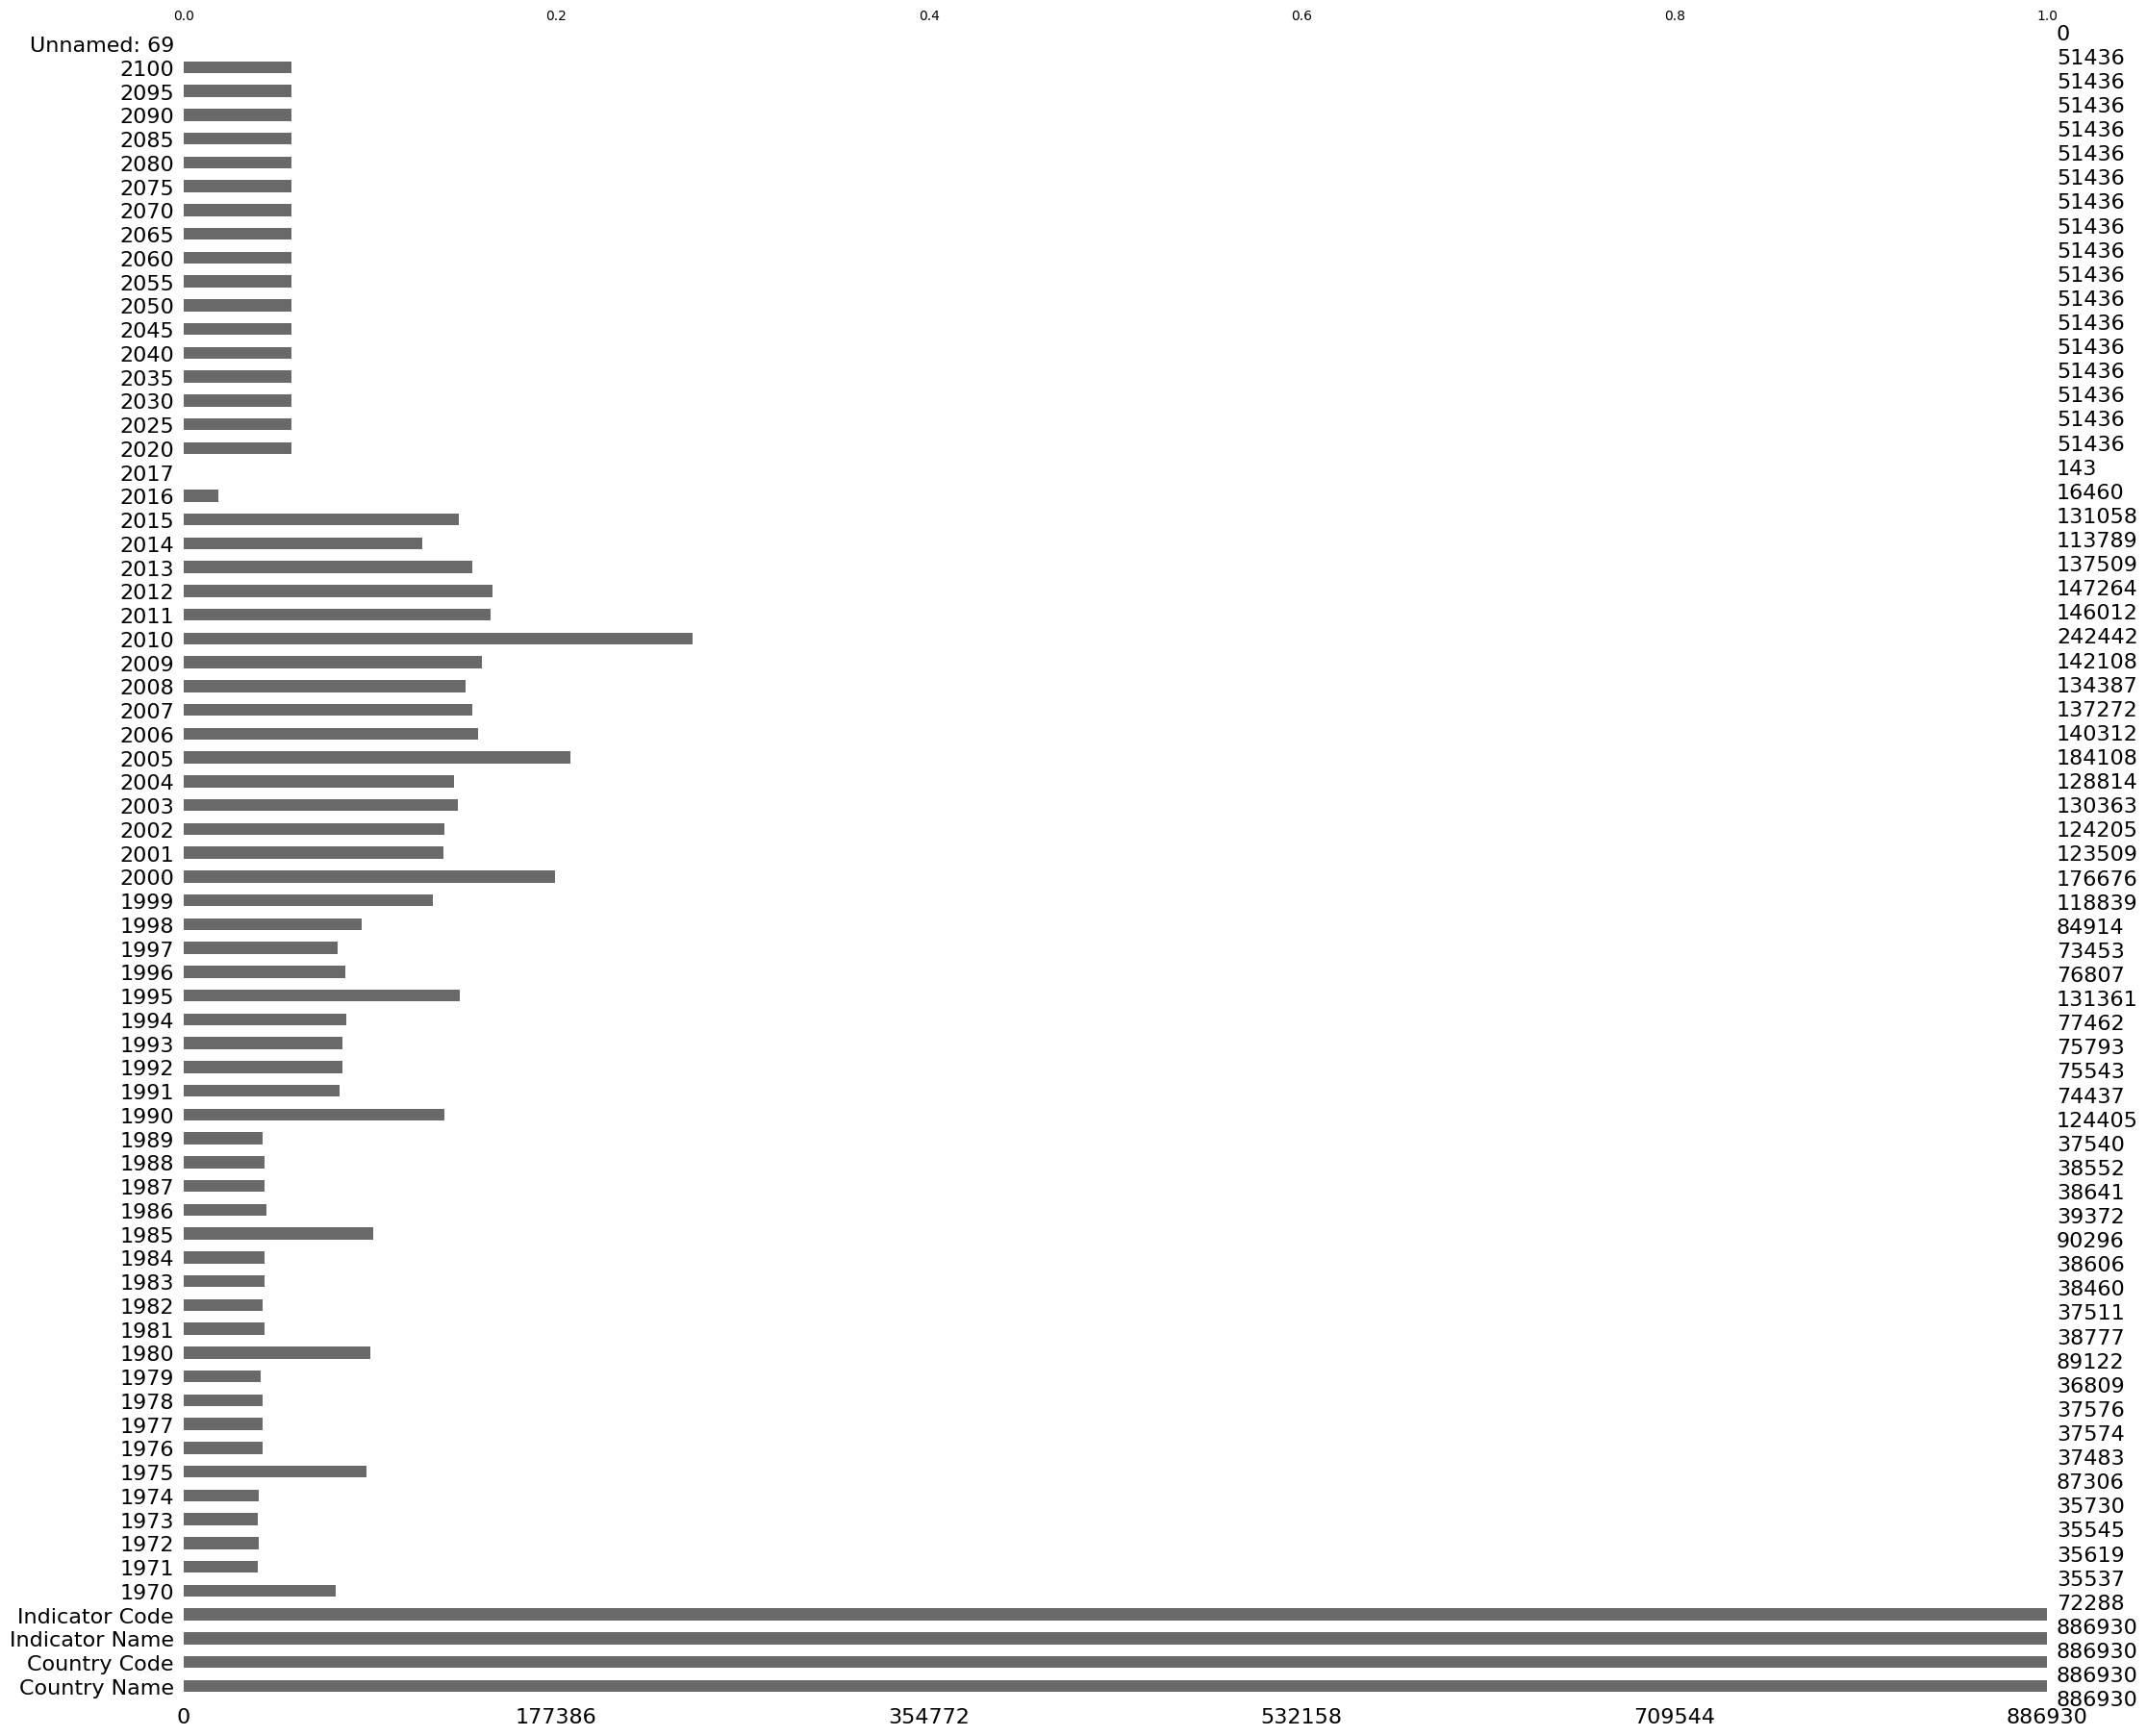

In [34]:
#Existe-t-il des valeurs manquantes dans ce jeu de données ?
df_data_na = df_data.isna().mean()
display(df_data_na.describe().T)
msno.bar(df_data)

print('Beaucoup de valeurs manquantes dans ce jeu de donnée, ainsi que des colonnes vides.')

<Axes: >

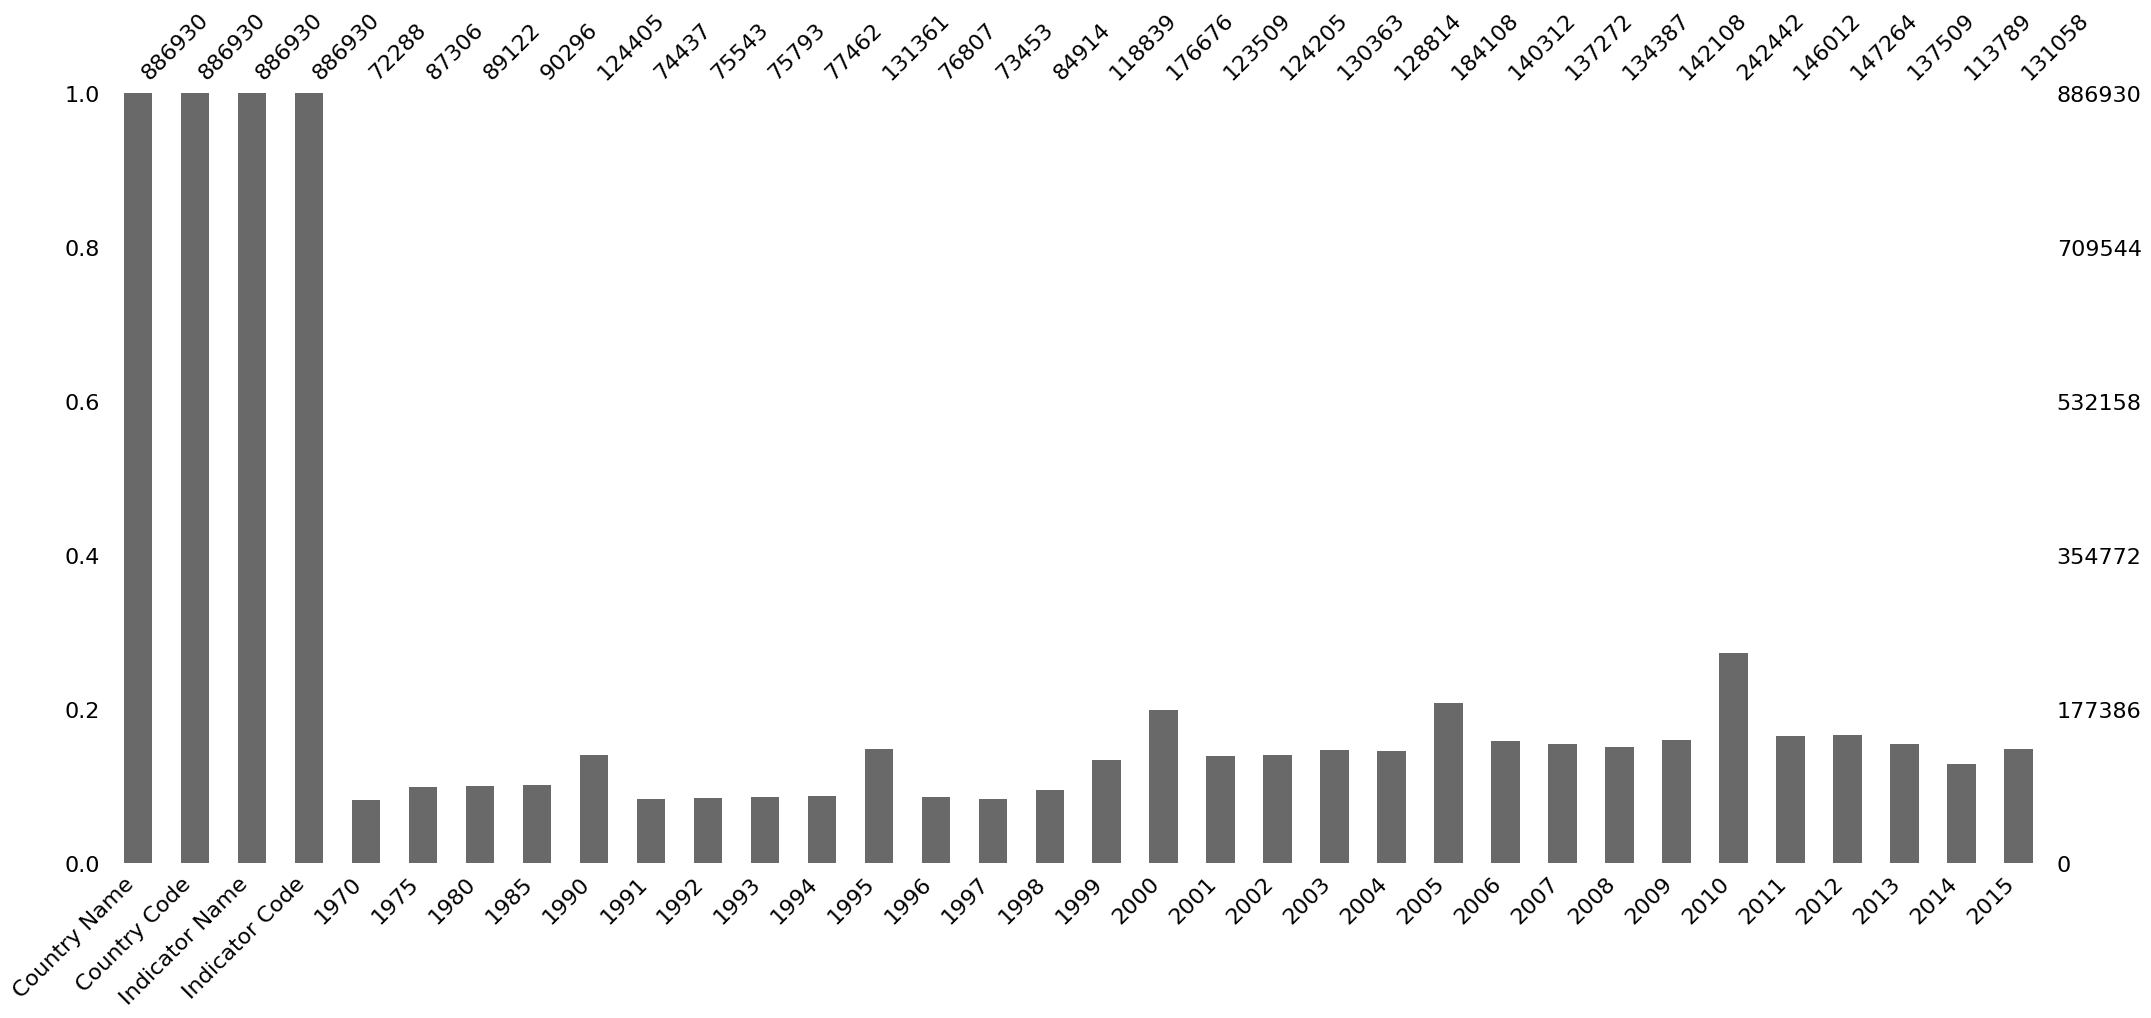

In [35]:
#Supprimer les colonnes ayant plus de 94% de valeurs manquantes
seuil = 0.94
colonnes_a_eliminer = df_data.columns[df_data.isna().mean() > seuil]
df_data = df_data.drop(colonnes_a_eliminer, axis=1)
msno.bar(df_data)

<Axes: >

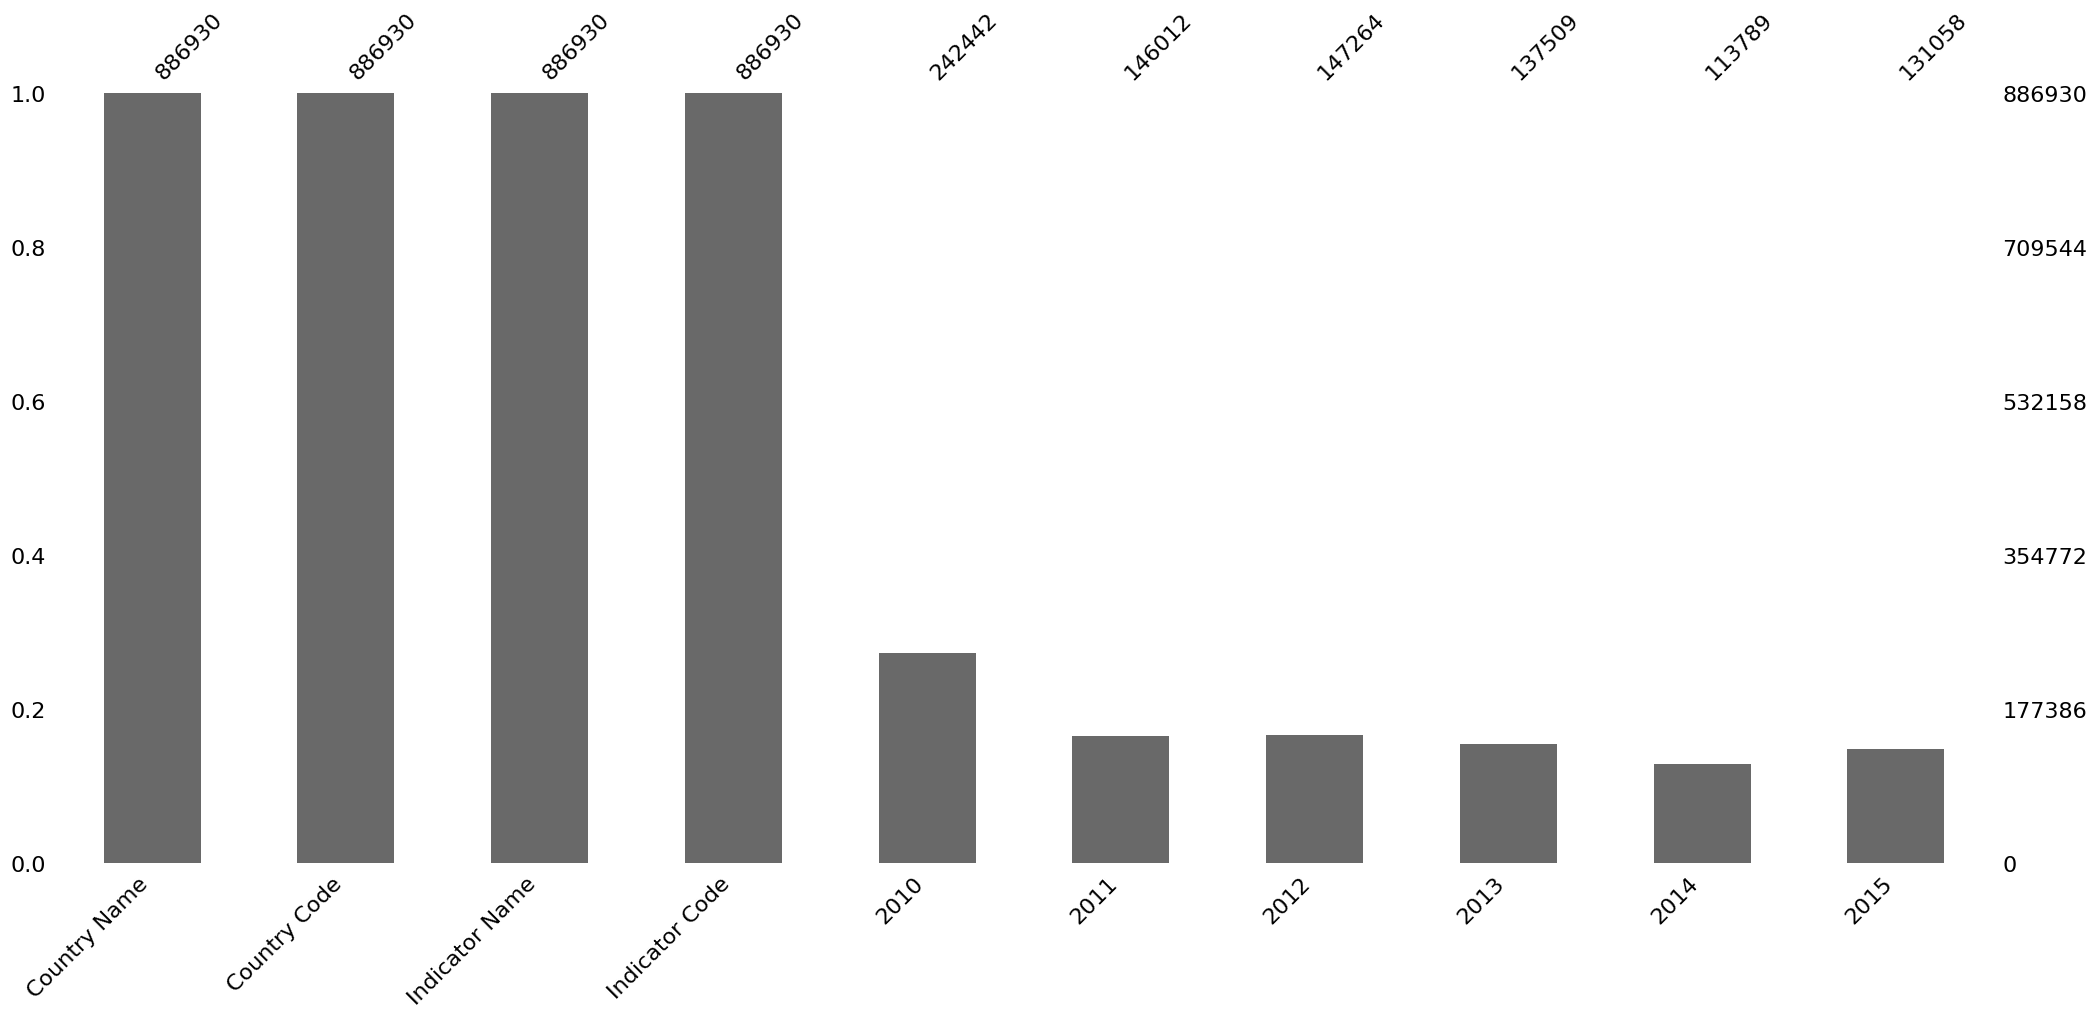

In [36]:
#L'année 2010 est l'année qui rassemble le plus de données
#L'année 2015 est l'année la plus récente rassemblant un nombre assez élevé de données
#On basera donc l'analyse de nos indicateurs sur la tranche 2010-2015 

df_data = df_data.drop(['1970', '1975', '1980', '1985', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', 
                        '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'], axis=1)
msno.bar(df_data)

### _Résumé :_
- Ce jeu de données comporte 886930 lignes et 70 colonnes
- Il comporte beaucoup de valeurs manquantes. Les colonnes ayant plus de 94% de valeurs manquantes sont supprimées.
- Aucun doublon
- Ce jeu de données donne le recensement de chaque indicateur par année pour chaque pays entre 1970 et 2017, puis tous les 5 ans à partir de 2020.
- L'année ayant le plus de données est 2010. L'année la plus récente avec un nombre suffisant de donnée est 2015. On se base donc sur cette tranche et on élimine toutes les autres années.
- Ce jeu de donnée possèdent aussi des groupes de pays considérés comme des pays. Ils seront effacés au moment de la jointure interne avec le fichier 'EdStatsCountry.csv'
- Ce fichier pourra être utilisé par la suite en lien avec le fichier 'EdStatsCountry.csv'

### _1.4 - EdStatsFootNote_

In [37]:
#Charger le fichier EdStatsFootNote.csv
df_footnote = pd.read_csv('EdStatsFootNote.csv', sep = ',')

In [38]:
#Afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées
df_footnote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [39]:
#Combien de lignes et de colonnes sont contenus dans df_data ?
df_footnote.shape

(643638, 5)

In [40]:
#Afficher le nom des colonnes, le type des colonnes et le nombre de valeurs par colonne
df_footnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

Aucune valeur manquante dans ce jeu de donnée.
La colonne 'unnamed: 4' ne contient pas de donnée. Elle est à supprimer


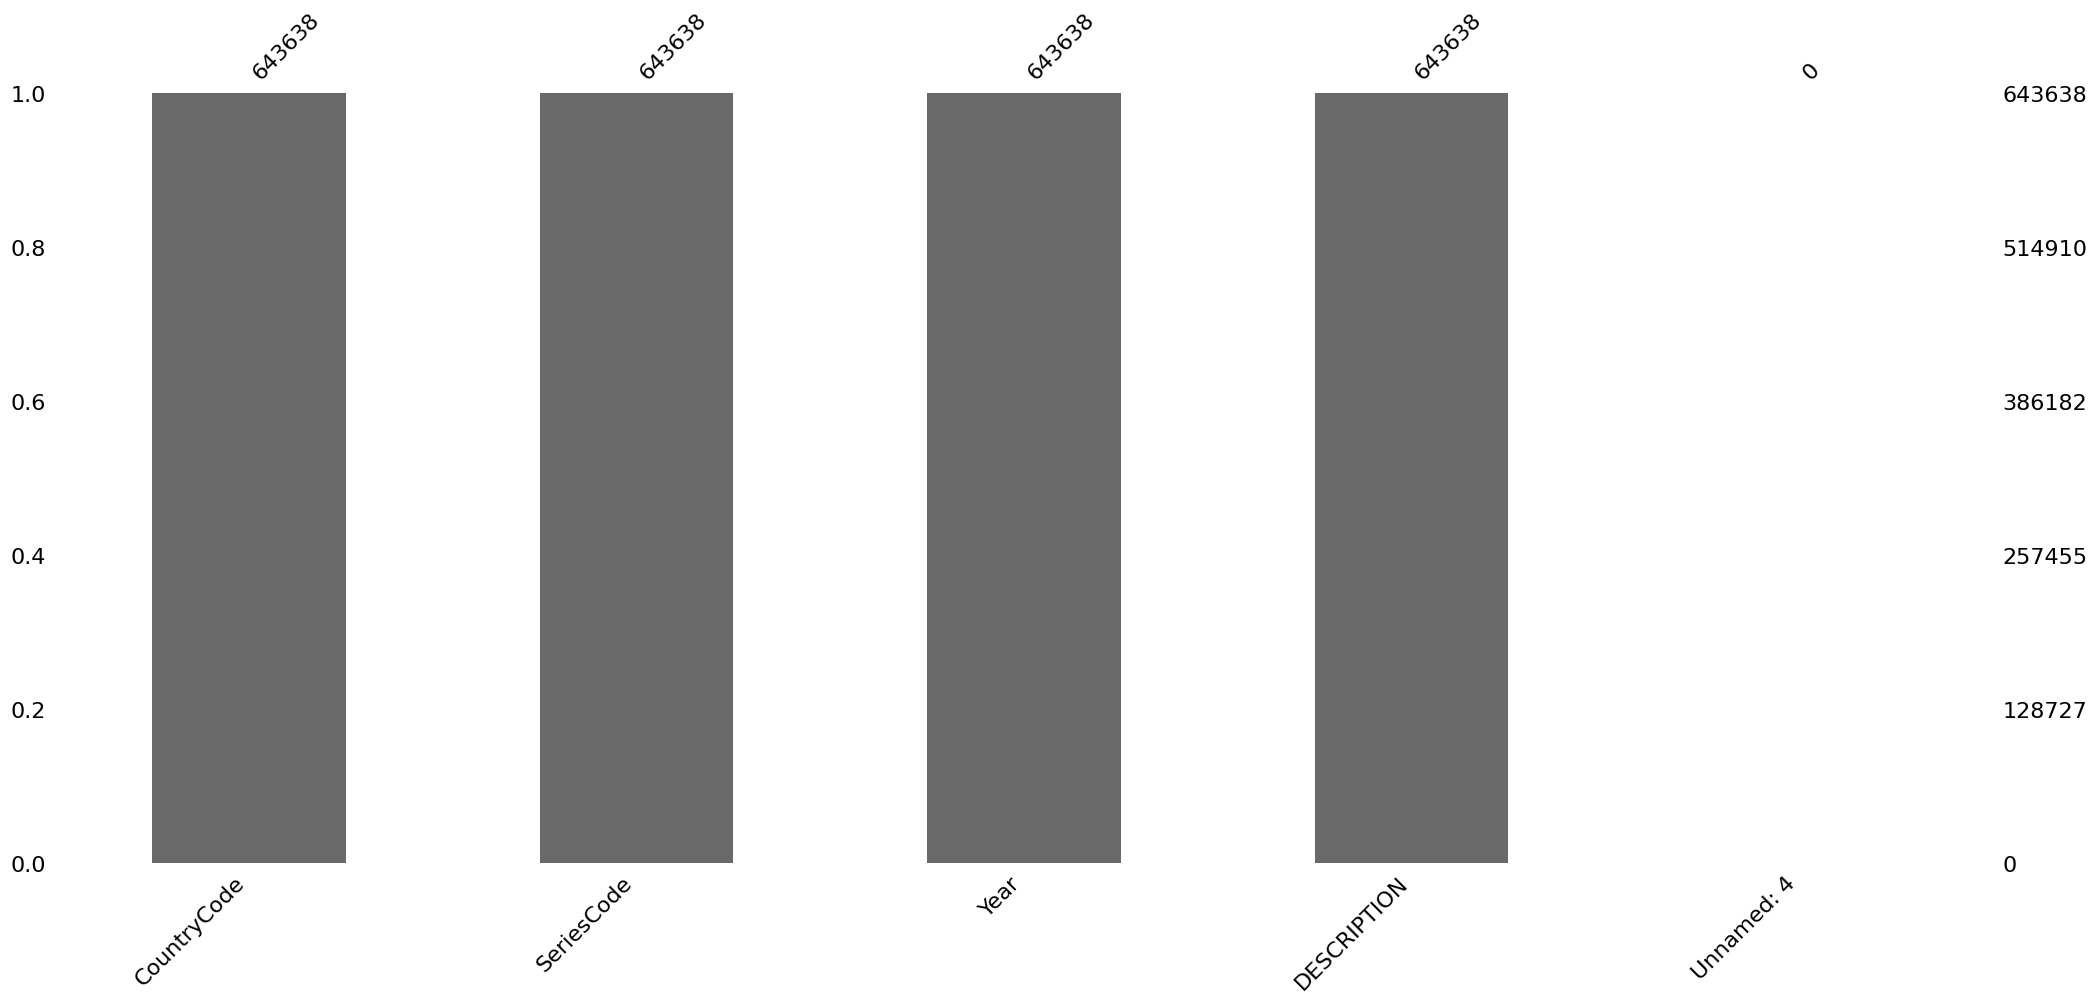

In [41]:
#Existe-t-il des valeurs manquantes dans ce jeu de données ?
display(df_footnote.isna().mean())
msno.bar(df_footnote)

print('Aucune valeur manquante dans ce jeu de donnée.')
print('La colonne \'unnamed: 4\' ne contient pas de donnée. Elle est à supprimer')

In [42]:
#Quelles sont les valeurs communes entre df_data['Indicator Name'] et df_footnote['SeriesCode'] ?
indicateurs_communs= df_data[df_data['Indicator Code'].isin(df_footnote['SeriesCode'])]['Indicator Name'].unique()

print('Il y a ' + str(len(indicateurs_communs)) + ' indicateurs communs.')

Il y a 1469 indicateurs communs.


In [43]:
#Existe-t-il des doublons pour la variable 'CountryCode' et 'SeriesCode' ?
df_footnote.duplicated(['CountryCode', 'SeriesCode']).sum()

570652

In [44]:
df_footnote['DESCRIPTION'].value_counts()

DESCRIPTION
Country Data                                      191188
UNESCO Institute for Statistics (UIS) estimate    171527
Estimated                                         117155
UIS Estimation                                     31395
Country estimation.                                26308
                                                   ...  
Uncertainty bound is 45.3 - 54.9                       1
Uncertainty bound is 61.8 - 81.7                       1
Uncertainty bound is 61.4 - 80.7                       1
Uncertainty bound is 27.3 - 48.2                       1
Uncertainty bound is 48.3 - 73.3                       1
Name: count, Length: 9102, dtype: int64

### _Résumé :_
- Ce jeu de données comprend 643638 lignes et 5 colonnes.
- Ce jeu de données ne comporte pas de valeurs manquantes pour les 4 premières colonne. La dernière colonne (Unnamed: 4) est à supprimer.
- Ce jeu de données comporte des informations seulement sur 1469 indicateurs en communs avec df_data. De plus, ces informations sont trop variables et pas forcément liées ou pertinentes. On décide de ne pas utiliser ce fichier pour la suite de l'analyse.

### _1.5 - EdStatsSeries_

In [45]:
#Charger le fichier EdStatsSeries.csv
df_serie = pd.read_csv('EdStatsSeries.csv', sep = ',')

In [46]:
#Afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées
df_serie.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#Combien de lignes et de colonnes sont contenus dans df_data ?
df_serie.shape

(3665, 21)

In [48]:
#Quel est le nom des colonnes ?
df_serie.columns.tolist()

['Series Code',
 'Topic',
 'Indicator Name',
 'Short definition',
 'Long definition',
 'Unit of measure',
 'Periodicity',
 'Base Period',
 'Other notes',
 'Aggregation method',
 'Limitations and exceptions',
 'Notes from original source',
 'General comments',
 'Source',
 'Statistical concept and methodology',
 'Development relevance',
 'Related source links',
 'Other web links',
 'Related indicators',
 'License Type',
 'Unnamed: 20']

In [49]:
#Afficher le type de colonne et le nombre de valeurs par colonne
df_serie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [50]:
#Existe-t-il des doublons pour la variable "Series Code" ?
df_serie.duplicated('Series Code').sum()

0

count    21.000000
mean      0.717248
std       0.430207
min       0.000000
25%       0.411733
50%       0.987176
75%       1.000000
max       1.000000
dtype: float64

Plusieurs colonnes ne contiennent pas ou peu de donnée.


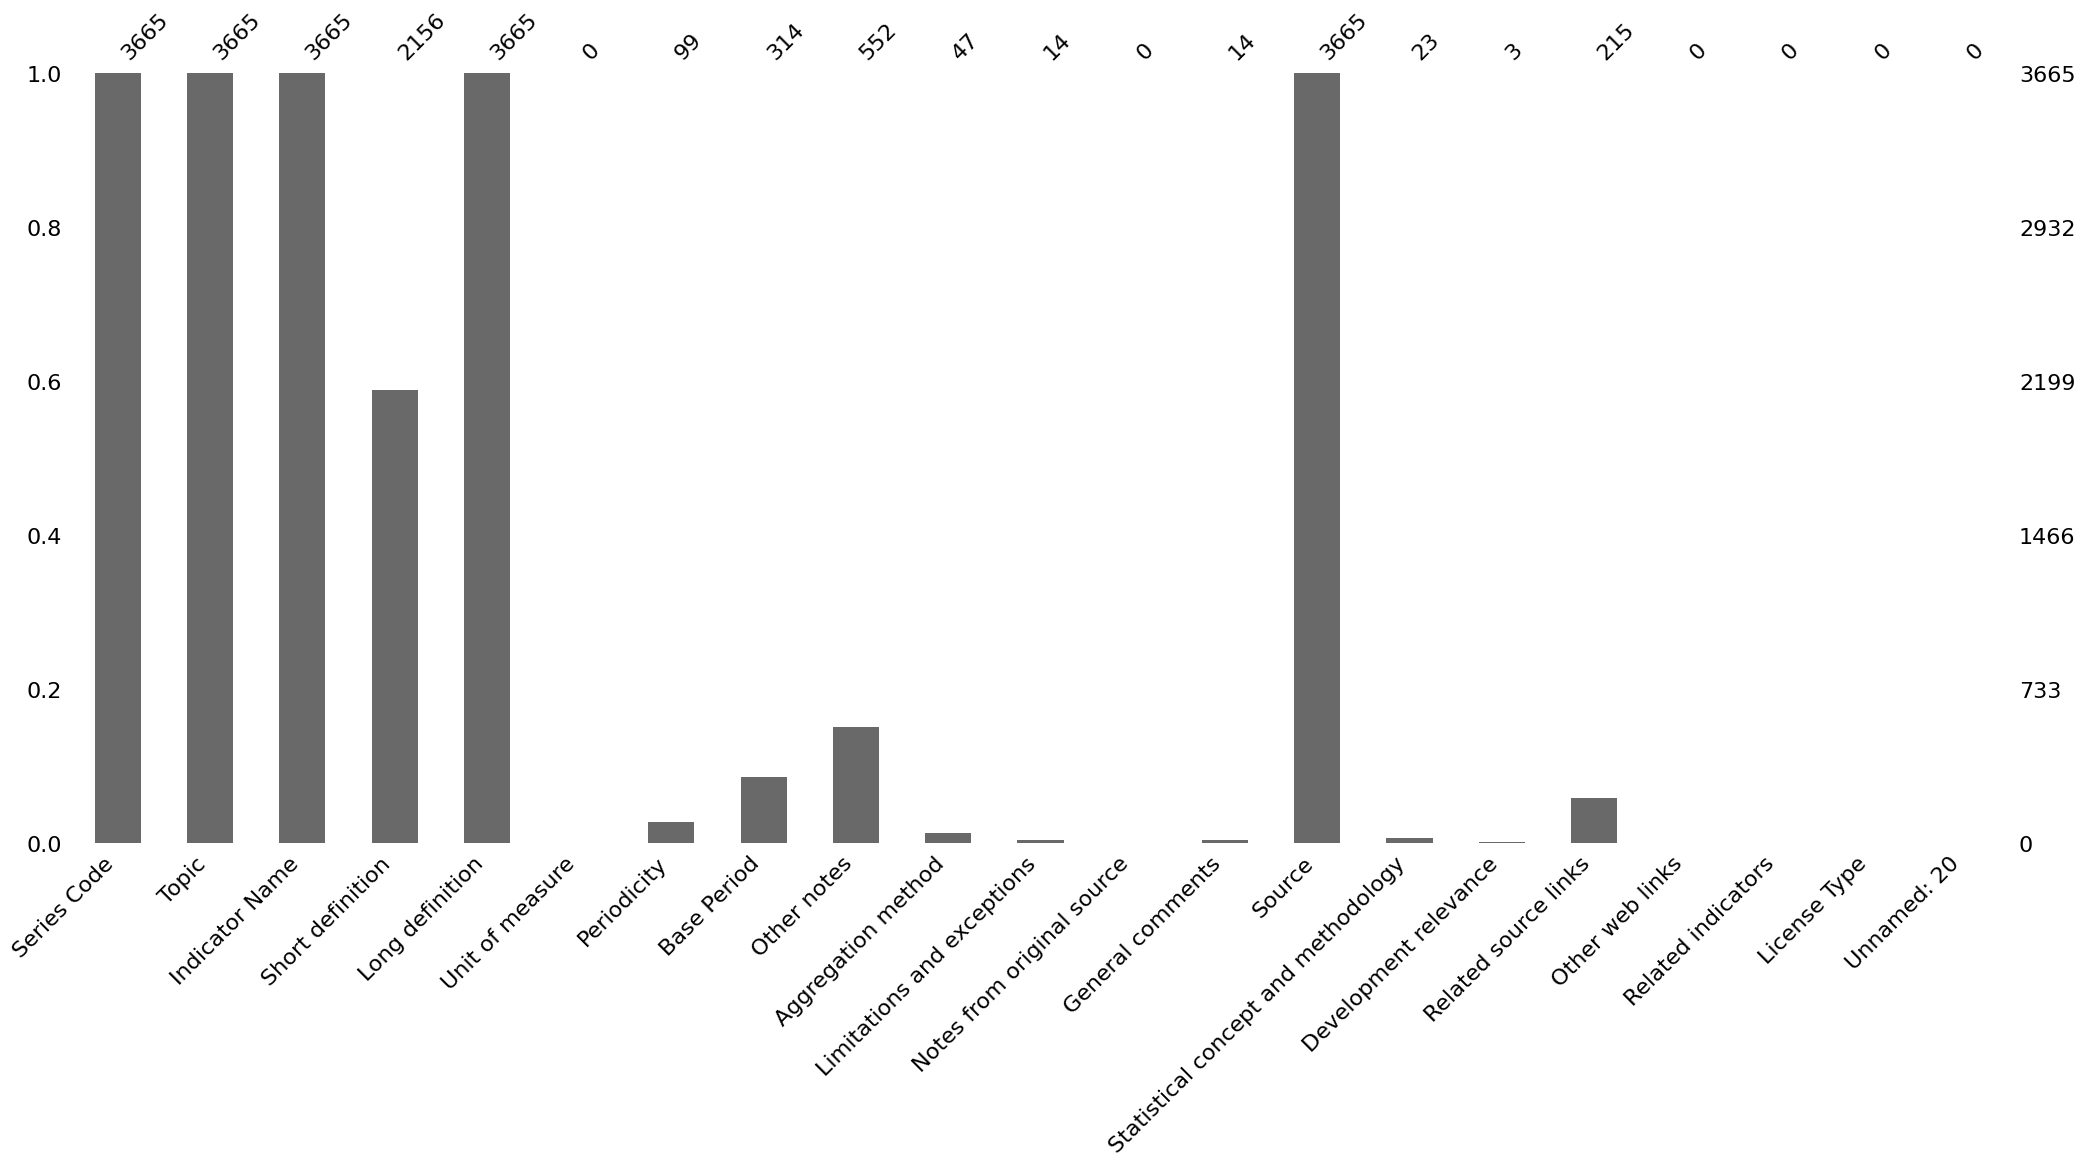

In [51]:
#Existe-t-il des valeurs manquantes dans ce jeu de données ?
df_serie_na = df_serie.isna().mean()
display(df_serie_na.describe())
msno.bar(df_serie)

print('Plusieurs colonnes ne contiennent pas ou peu de donnée.')

In [52]:
#Supprimer les colonnes ayant plus de 70% de valeurs manquantes
seuil = 0.7
colonnes_a_eliminer = df_serie.columns[df_serie.isna().mean() > seuil]
df_serie = df_serie.drop(colonnes_a_eliminer, axis=1)
df_serie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Series Code       3665 non-null   object
 1   Topic             3665 non-null   object
 2   Indicator Name    3665 non-null   object
 3   Short definition  2156 non-null   object
 4   Long definition   3665 non-null   object
 5   Source            3665 non-null   object
dtypes: object(6)
memory usage: 171.9+ KB


In [53]:
#Quels indicateurs sont égaux entre 'EdStatsData.csv' et 'EdStatsSeries.csv'
df_data['Indicator Name'].nunique() == df_serie['Series Code'].nunique()

True

In [54]:
# Obtenir les 10 sources d'information majoritaires
sources = df_serie['Source'].value_counts()
sources.head(10)

Source
UNESCO Institute for Statistics                                                                                                                             1269
Early Grade Reading Assessment (EGRA): https://www.eddataglobal.org/reading/                                                                                 403
Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/                                                                                                   360
Wittgenstein Centre for Demography and Global Human Capital: http://www.oeaw.ac.at/vid/dataexplorer/                                                         308
Systems Approach for Better Education Results (SABER), World Bank                                                                                            215
Programme d'Analyse des Systèmes Educatifs de la CONFEMEN/Program for the Analysis of CONFEMEN Education Systems (PASEC): http://www.pasec.confemen.org/     140
Demographic and Health Surv

### _Résumé :_
- Ce jeu de données comporte 3665 lignes et 21 colonnes.
- Il comporte des colonnes avec aucune ou peu de valeurs, elles sont supprimées.
- Aucun doublon.
- Ce jeu de données permet de classifier les indicateurs par topic et d'en avoir une description longue. Pour le moment, on ne l'élimine pas. Cela pourrait être utile lors de la sélection des indicateurs pour la suite de l'analyse.

**Fichiers conservés pour la pré-analyse:**
- **EdStatsCountry.csv**: Ce jeu de données apporte des informations sur les pays, les régions du monde auxquelles ils appartiennent ainsi que le niveau de revenu de ces pays. Ce jeu de données fournit également des informations sur les années de collecte de données de divers indicateurs sur ces pays dont le dernier recensement de population. 
- **EdStatsData.csv**: Ce jeu de données apporte des informations sur l'évolution des indicateur au cours du temps.
  --> 'EdStatsCountry.csv' et 'EdStatsData.csv' possèdent tous les deux une variable donnant le code des pays qui servira pour effectuer une jointure interne.
- **EdStatsSeries.csv**: Permet de classifier les indicateurs par topic et d'en avoir une description longue. On le conserve pour nous aider dans la recherche des indicateurs d'intérêt pour notre analyse.

## Partie 2 - Choix des indicateurs pour l'analyse 

3665 indicateurs sont répertoriés dans nos fichiers. Pour notre analyse, la mission est de déterminer les pays avec un fort potentiel de clients pour les services de academy et comment ce potentiel pourrait évoluer. Ce travail doit permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays.

Au vu de ces informations, nous recherchons des indicateurs selon les critères suivants :
- Academy propose des formations en ligne. On va donc chercher des indicateurs mettant en évidence l'accès à internet/ à un matériel informatique (ordinateur), par pays.
- Academy propose des formations de niveau lycée et université. On va donc chercher un indicateur mettant en évidence le taux de la population en étude secondaire et supérieur dans le pays
- Academy veut savoir comment le potentiel de ces pays pourrait évoluer, on peut donc imaginer que des indicateur sur le taux de croissance du pays seraient intérressant pour déterminer l'évolution d'Academy dans ces pays sur le long terme. (PIB; Croissance de la population: tranches d'âge jeune = futurs étudiants potentiels; Stabilité politique et économique : des conditions politiques et économiques stables peuvent favoriser la croissance des entreprises et créer un environnement propice aux investissements à long terme.)

In [55]:
#Jointure interne entre le fichier "EdStatsCountry.csv" et "EdStatsData.csv" via 'Country Code'
df_joint = pd.merge(df, df_data, how='inner', on='Country Code')
df_joint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414145 entries, 0 to 414144
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Country Code              414145 non-null  object 
 1   Short Name                414145 non-null  object 
 2   Table Name                414145 non-null  object 
 3   Long Name                 414145 non-null  object 
 4   Region                    410480 non-null  object 
 5   Income Group              410480 non-null  object 
 6   Latest population census  414145 non-null  Int64  
 7   Country Name              414145 non-null  object 
 8   Indicator Name            414145 non-null  object 
 9   Indicator Code            414145 non-null  object 
 10  2010                      121148 non-null  float64
 11  2011                      72861 non-null   float64
 12  2012                      74609 non-null   float64
 13  2013                      68319 non-null   f

,count,mean,std,min,25%,50%,75%,max
Total,3665.0,107.241473,137.940936,0.0,3.000000,57.00000,164.000000,564.000000
%,3665.0,7.385776,9.500064,0.0,0.206612,3.92562,11.294766,38.842975


D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


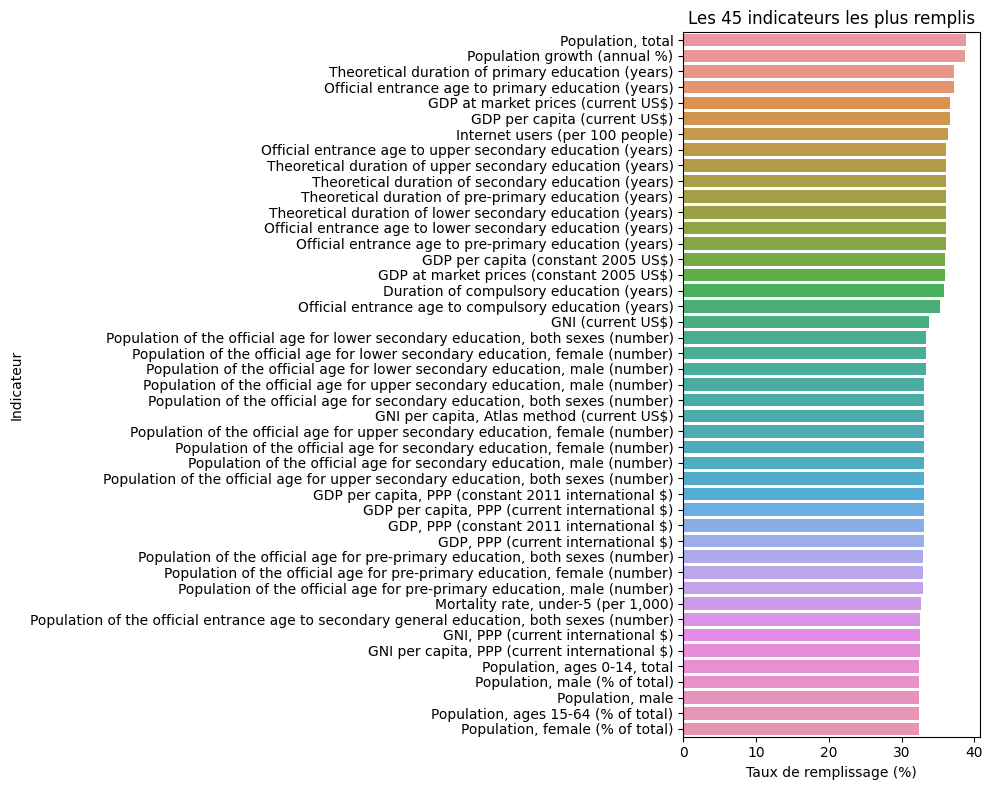

Indicateurs restants : 536


In [56]:
#Nombre de valeurs par indicateur sur les colonnes 2010 à 2015
annees_dinterets = df_joint.columns[10:15].tolist()
valeur_par_indicateur = df_joint.copy()
valeur_par_indicateur = valeur_par_indicateur.groupby('Indicator Name')[annees_dinterets].count()
valeur_par_indicateur = valeur_par_indicateur.reset_index()

#Création d'une colonne 'Total' et '%' pour le nombre et le taux de valeur par indicateur pour les 113 pays sur 6 ans
valeur_par_indicateur['Total']= valeur_par_indicateur[annees_dinterets].sum(axis=1, skipna=True)
valeur_par_indicateur['%']=(valeur_par_indicateur['Total']*100/1452) # (242 x 6)
display(valeur_par_indicateur[['Total','%']].describe().T)

#Représentation graphique
valeur_par_indicateur_croissant = valeur_par_indicateur.sort_values(by='%', ascending=False)
les_30_premiers=valeur_par_indicateur_croissant.head(45)
plt.figure(figsize=(10, 8))
sns.barplot(x='%', y='Indicator Name', data=les_30_premiers)
plt.xlabel('Taux de remplissage (%)')
plt.ylabel('Indicateur')
plt.title('Les 45 indicateurs les plus remplis')
plt.tight_layout()
plt.show()

#Suppression des indicateurs avec moins de 20% de remplissage de valeurs
df_joint_filtre=valeur_par_indicateur_croissant[valeur_par_indicateur_croissant['%']>20]
print(f'Indicateurs restants : {df_joint_filtre.shape[0]}')

In [57]:
df_joint_filtre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 2533 to 2542
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  536 non-null    object 
 1   2010            536 non-null    int64  
 2   2011            536 non-null    int64  
 3   2012            536 non-null    int64  
 4   2013            536 non-null    int64  
 5   2014            536 non-null    int64  
 6   Total           536 non-null    int64  
 7   %               536 non-null    float64
dtypes: float64(1), int64(6), object(1)
memory usage: 37.7+ KB


### _2.1 Recherche indicateurs_

In [58]:
#Recherche d'indicateurs d'accès à internet et/ou à un ordinateur
df_joint_filtre[df_joint_filtre['Indicator Name'].str.contains('internet|Internet|computers|Computers')]

,Indicator Name,2010,2011,2012,2013,2014,Total,%
1375,Internet users (per 100 people),106,107,106,105,105,529,36.432507


In [59]:
#Recherche d'indicateurs du taux de population en étude secondaire ou supérieure
df_joint_filtre[(df_joint_filtre['Indicator Name'].str.contains('enrolment')|df_joint_filtre['Indicator Name'].str.contains('Enrolment')) & df_joint_filtre['Indicator Name'].str.contains('both sexes')
&(df_joint_filtre['Indicator Name'].str.contains('upper secondary')|df_joint_filtre['Indicator Name'].str.contains('tertiary'))]

,Indicator Name,2010,2011,2012,2013,2014,Total,%
1220,"Enrolment in upper secondary general, both sex...",89,88,89,84,73,423,29.132231
1214,"Enrolment in upper secondary education, both s...",88,89,88,83,73,421,28.994490
1218,"Enrolment in upper secondary education, public...",87,85,88,80,70,410,28.236915
1343,"Gross enrolment ratio, upper secondary, both s...",83,82,80,76,80,401,27.617080
1216,"Enrolment in upper secondary education, privat...",84,80,87,79,69,399,27.479339
1212,"Enrolment in tertiary education, all programme...",76,76,81,78,75,386,26.584022
1339,"Gross enrolment ratio, tertiary, both sexes (%)",69,72,76,72,70,359,24.724518
1201,"Enrolment in tertiary education per 100,000 in...",73,75,78,73,57,356,24.517906
1222,"Enrolment in upper secondary vocational, both ...",74,76,78,69,57,354,24.380165
1327,"Gross enrolment ratio, primary to tertiary, bo...",64,65,67,62,63,321,22.107438


In [60]:
#Recherche d'indicateurs du taux de revenu des pays
df_joint_filtre[df_joint_filtre['Indicator Name'].str.contains('GDP per capita')&df_joint_filtre['Indicator Name'].str.contains('PPP')]  

,Indicator Name,2010,2011,2012,2013,2014,Total,%
1246,"GDP per capita, PPP (constant 2011 internation...",96,98,96,96,94,480,33.057851
1247,"GDP per capita, PPP (current international $)",96,98,96,96,94,480,33.057851


In [61]:
#Recherche d'indicateurs du taux de croissance de la population
df_joint_filtre[df_joint_filtre['Indicator Name'].str.contains('growth')|df_joint_filtre['Indicator Name'].str.contains('Population') & df_joint_filtre['Indicator Name'].str.contains('total')]

,Indicator Name,2010,2011,2012,2013,2014,Total,%
2533,"Population, total",113,113,113,113,112,564,38.842975
2307,Population growth (annual %),113,112,113,113,112,563,38.774105
2422,"Population, ages 0-14, total",94,94,94,94,94,470,32.369146
2532,"Population, male (% of total)",94,94,94,94,94,470,32.369146
2483,"Population, ages 15-64 (% of total)",94,94,94,94,94,470,32.369146
...,...,...,...,...,...,...,...,...
2361,"Population, age 14, total",86,86,86,86,0,344,23.691460
2367,"Population, age 16, total",86,86,86,86,0,344,23.691460
2418,"Population, age 9, total",86,86,86,86,0,344,23.691460
2370,"Population, age 17, total",86,86,86,86,0,344,23.691460


### Résumé des indicateurs retenus :
- **IT.NET.USER.P2** :Internet users (per 100 people)
- **SE.TER.ENRL** : Enrolment in tertiary education, all programmes, both sexes (number)
- **UIS.E.3** : Enrolment in upper secondary education, both sexes (number)
- **NY.GDP.PCAP.PP.CD** : GDP per capita, PPP (current international $)
- **SP.POP.TOTL**: Population, total	
- **SP.POP.GROW** : Population growth (annual %)

### Période temporelle retenue
Le filtrage à partir de ces indicateurs dépendra de la moyenne des valeurs comprises entre **2010 et 2015**. En effet 2015 est l'année la plus récente mais ayant le moins de données. 2010 est l'année ayant le plus de données. La moyenne permettra donc de ne pas perdre de données ainsi qu'une représentation plus stable de la tendance générale.

In [62]:
# Filtre du df_joint en fonction des indicateurs retenus
df_final = df_joint[
    (df_joint['Indicator Code'] == 'IT.NET.USER.P2') |
    (df_joint['Indicator Code'] == 'SE.TER.ENRL') |
    (df_joint['Indicator Code'] == 'UIS.E.3') |
    (df_joint['Indicator Code'] == 'SP.POP.TOTL') |
    (df_joint['Indicator Code'] == 'NY.GDP.PCAP.PP.CD') |
    (df_joint['Indicator Code'] == 'SP.POP.GROW')
]
df_final.info()
df_final['Country Code'].nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 1204 to 413013
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Code              678 non-null    object 
 1   Short Name                678 non-null    object 
 2   Table Name                678 non-null    object 
 3   Long Name                 678 non-null    object 
 4   Region                    672 non-null    object 
 5   Income Group              672 non-null    object 
 6   Latest population census  678 non-null    Int64  
 7   Country Name              678 non-null    object 
 8   Indicator Name            678 non-null    object 
 9   Indicator Code            678 non-null    object 
 10  2010                      592 non-null    float64
 11  2011                      595 non-null    float64
 12  2012                      597 non-null    float64
 13  2013                      588 non-null    float64
 14  2014     

113

In [63]:
annees = ['2010', '2011', '2012', '2013', '2014', '2015']
for annee in annees:
    df_final[annee] = df_final[annee].ffill()
    
df_final['2010s'] = df_final[annees].mean(axis=1, skipna=True)
df_final['2010s'].unique()

C:\Users\Anais\AppData\Local\Temp\ipykernel_18376\3630571258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[annee] = df_final[annee].ffill()
C:\Users\Anais\AppData\Local\Temp\ipykernel_18376\3630571258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['2010s'] = df_final[annees].mean(axis=1, skipna=True)


array([ 1.83950000e+03,  2.71766667e+03,  8.05163008e+03,  7.60568712e+01,
        4.67812409e-01,  1.02937000e+05,  1.54236167e+05,  1.51643667e+05,
        1.06237796e+04,  5.48681486e+01, -2.68682418e-01,  2.89725267e+06,
        9.70040667e+05,  1.10183333e+03,  8.92074041e+01, -1.32355719e+00,
        8.14426667e+04,  1.28260333e+05,  1.42216500e+05,  6.30648744e+04,
        8.33166652e+01,  2.95629503e+00,  8.84584067e+06,  3.78333650e+06,
        3.10062683e+06,  1.96474063e+04,  5.74071774e+01,  1.03668570e+00,
        4.23194520e+07, -2.05793388e-01,  5.54113333e+04,  2.83851667e+04,
        2.02701667e+04,  1.97384167e+04,  5.96966667e+01,  1.09287530e+00,
        9.72965000e+04,  1.15147833e+06,  9.00639167e+05,  4.36966856e+04,
        8.10836190e+01,  1.53846330e+00,  2.29112355e+07,  3.93076120e+05,
        3.80010812e+05,  4.66691339e+04,  7.99157923e+01,  5.69167781e-01,
        8.47319283e+06,  1.88960167e+05,  3.50233333e+05,  1.66930961e+04,
        6.25333362e+01,  

### _2.2 - Population totale_

Ce premier indicateur va nous permettre de filtrer les pays les moins peuplés. Nous ferons le tri sur la moyenne des années 2010 à 2015. Les pays avec une population totale <1 270 000 habitants seront supprimés

,count,mean,std,min,25%,50%,75%,max
Latest population census,113.0,2010.654867,0.86365,2008.0,2010.0,2011.0,2011.0,2013.0
2010,113.0,30063570.737719,130957143.883991,10531.0,279569.0,3721525.0,11333051.0,1337705000.0
2011,113.0,30251315.958919,131606553.683878,10628.0,280601.0,3688865.0,11354651.0,1344130000.0
2012,113.0,30456533.982984,132275849.315248,10725.0,281585.0,3648200.0,11382146.0,1350695000.0
2013,113.0,30664447.598319,132955448.413021,10819.0,282509.0,3711481.0,11412167.0,1357380000.0
2014,113.0,30875380.333975,133656648.919783,1513.0,283385.0,3903986.0,11439767.0,1364270000.0
2015,113.0,31083822.678602,134362017.055262,194.0,284217.0,3969249.0,11461432.0,1371220000.0
2010s,113.0,30565845.215086,132635005.726769,10768.666667,281977.666667,3627685.166667,11397202.333333,1354233333.333333


Quantile 35% : 2010s    1266884.1


D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


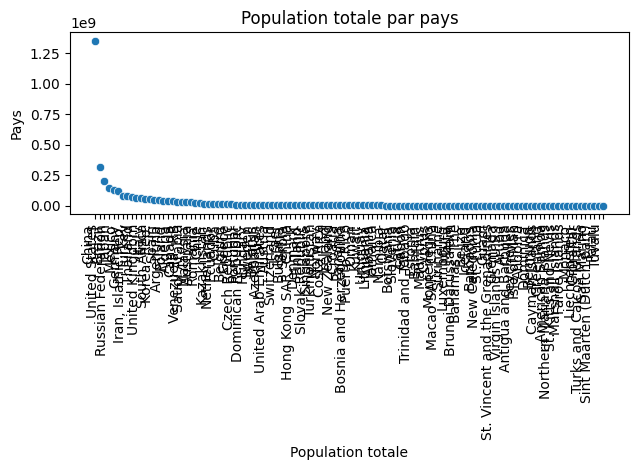

Les pays supprimés sont:
['Mauritius', 'Cyprus', 'Montenegro', 'Macao SAR, China', 'Suriname', 'Luxembourg', 'Malta', 'Brunei Darussalam', 'Bahamas, The', 'Belize', 'Iceland', 'Barbados', 'New Caledonia', 'St. Lucia', 'Guam', 'St. Vincent and the Grenadines', 'Grenada', 'Virgin Islands (U.S.)', 'Aruba', 'Antigua and Barbuda', 'Seychelles', 'Isle of Man', 'Andorra', 'Dominica', 'Bermuda', 'Cayman Islands', 'Greenland', 'American Samoa', 'Northern Mariana Islands', 'St. Kitts and Nevis', 'Marshall Islands', 'Faroe Islands', 'Monaco', 'Liechtenstein', 'Gibraltar', 'Turks and Caicos Islands', 'San Marino', 'Sint Maarten (Dutch part)', 'Palau', 'Tuvalu']


73

In [64]:
#Selection des lignes avec indicateur = SP.POP.TOTL
population_totale = df_final.loc[df_final['Indicator Code'] == 'SP.POP.TOTL']
population_totale = population_totale.sort_values(by='2010s', ascending = False)

#Statistiques descriptives
display(population_totale.describe().T)
quantile_35=population_totale[['2010s']].quantile(0.35).to_string()
print(f'Quantile 35% : {quantile_35}')

#Représentation graphique
plt.figure()
sns.scatterplot(x='Country Name', y='2010s', data=population_totale)
plt.xlabel('Population totale')
plt.ylabel('Pays')
plt.title('Population totale par pays')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#Suppression des pays avec une population totale < 1 250 000 habitants
filtre_population = population_totale[population_totale['2010s'] < 1270000]['Country Name'].tolist()
print('Les pays supprimés sont:')
print(filtre_population)

df_final = df_final[~df_final['Country Name'].isin(filtre_population)]
df_final.head()
df_final['Country Name'].nunique()

### _2.3 - Internet Users_

Le nombre d'utilisateurs d'Internet connaît actuellement une évolution rapide et significative. Les variations entre les années 2010 et 2015 peuvent être très marquées, et prendre la valeur moyenne sur cette période pourrait potentiellement fausser les données en atténuant ces variations importantes. Afin de mieux refléter la réalité actuelle et les tendances les plus récentes, nous avons choisi de nous baser sur la valeur la plus récente de cet indicateur pour chaque pays. Cela nous permet de capturer plus précisément les dynamiques en constante évolution de l'utilisation d'Internet dans chaque pays, offrant ainsi une base plus pertinente pour nos analyses et décisions.

La colonne '2015', avec les valeurs les plus récentes, n'a pas de valeurs manquantes. Elle sera donc l'année sur laquel on base notre filtre.

On supprime les pays avec un taux d'utilisateur internet <62%

,count,mean,std,min,25%,50%,75%,max
Latest population census,73.0,2010.69863,0.892639,2008.0,2010.0,2011.0,2011.0,2013.0
2010,73.0,53.121203,23.166509,3.0,37.37,53.3,71.69,93.39
2011,73.0,56.643509,22.236095,5.0,42.2,55.2,74.889973,93.489983
2012,73.0,60.24283,21.385601,7.1958,47.5,61.939973,76.919993,94.649978
2013,73.0,63.710983,20.55124,9.6,51.04,66.45,80.6188,95.0534
2014,73.0,66.518714,19.457006,12.2,54.551002,68.57,80.995825,96.3
2015,73.0,69.336665,17.809618,14.996775,58.141735,71.064068,84.560519,96.8103
2010s,73.0,61.595651,20.461643,8.665429,49.803159,62.481168,79.495804,94.948943


D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Programme\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programme\l

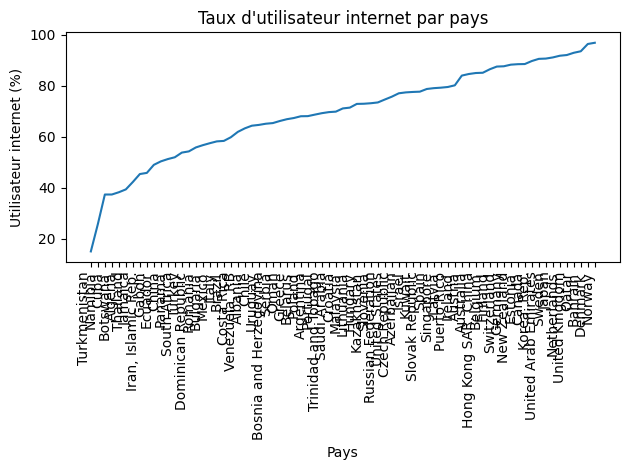

Pays à supprimer:
378870          Turkmenistan
283580               Namibia
100330                  Cuba
78340               Botswana
129650               Algeria
375205              Thailand
210280               Jamaica
195620    Iran, Islamic Rep.
151640                 Gabon
133315               Ecuador
93000                  China
305570                Panama
411855          South Africa
386200                Turkey
125985    Dominican Republic
327560               Romania
41690               Bulgaria
257925                Mexico
206615                 Italy
67345                 Brazil
96665             Costa Rica
404525         Venezuela, RB
Name: Country Name, dtype: object
Nombre de pays restants dans df_final: 51


In [65]:
#Statistiques descriptives de l'indicateur 'internet user' 
indicateur_education = ['IT.NET.USER.P2']
internet_users = df_final[df_final['Indicator Code'].isin(indicateur_education)]
display(internet_users.describe().T)
internet_users.head(15)

#Représentation graphique
internet_users = internet_users.sort_values(by='2015')
plt.figure()
sns.lineplot(x='Country Name', y='2015', data=internet_users)
plt.xlabel('Pays')
plt.ylabel('Utilisateur internet (%)')
plt.title('Taux d\'utilisateur internet par pays')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Afficher les pays à supprimer
internet_users_a_supp = internet_users[internet_users['2015'] < 62]['Country Name']
print("Pays à supprimer:")
print(internet_users_a_supp)

# Suppression des pays du df_final
df_final = df_final[~df_final['Country Name'].isin(internet_users_a_supp)]

# Nombre de pays restants dans df_final
print("Nombre de pays restants dans df_final:", df_final['Country Name'].nunique())


### _2.4 Taux d'inscription dans le secondaire et le supérieur_
Une analyse de ces indicateur basée sur la moyenne des années 2010 à 2015 permettra une estimation plus réaliste en prenant en considération les variations d'une année à l'autre, permettant ainsi une vision plus équilibré et représentative de la situation dans chaque pays.

Pour l'analyse, nous allons combiner les deux indicateurs.

In [66]:
#Statistique descriptive
tertiary_education = df_final.loc[df_final['Indicator Code'] == 'SE.TER.ENRL']
secondary_education = df_final.loc[df_final['Indicator Code'] == 'UIS.E.3']
display(tertiary_education.describe().T)
display(secondary_education.describe().T)

,count,mean,std,min,25%,50%,75%,max
Latest population census,51.0,2010.666667,0.840635,2009.0,2010.0,2011.0,2011.0,2013.0
2010,51.0,2844744.529412,7897844.673696,13846.0,207409.5,383627.0,1577730.5,49554112.0
2011,51.0,2508387.235294,7599048.719001,10628.0,191719.0,365665.0,1192892.0,49936638.0
2012,51.0,2596672.137255,7616417.917307,10725.0,206937.0,380757.0,1665016.0,50199853.0
2013,51.0,1345065.554841,3037418.288301,20902.0,180309.5,309009.0,1265306.5,19972624.0
2014,51.0,2923058.559436,8512877.441055,25255.0,196627.5,362200.0,1629698.0,50746659.0
2015,51.0,3817481.854779,9915277.2899,21288.0,161274.5,374048.0,1947049.5,51014947.0
2010s,51.0,2672568.311836,6621318.378753,20081.166667,254675.514323,479097.166667,1802806.416667,41920665.833333


,count,mean,std,min,25%,50%,75%,max
Latest population census,51.0,2010.666667,0.840635,2009.0,2010.0,2011.0,2011.0,2013.0
2010,51.0,1326934.196078,3267230.753511,32111.0,150305.0,341406.0,991332.5,20246871.0
2011,51.0,987929.862745,1867600.482288,10628.0,152994.5,343322.0,1031076.5,11809382.0
2012,51.0,986976.235294,1862983.911854,10725.0,159492.0,348434.0,1147186.5,11748263.0
2013,51.0,1049385.567708,1891025.207601,36576.0,165642.5,359603.0,1168468.5,11646415.0
2014,51.0,2726509.223039,8245511.532559,40991.0,202406.0,372641.0,1670596.5,50746659.0
2015,51.0,3813786.423407,9916513.268869,21288.0,161274.5,374048.0,1947049.5,51014947.0
2010s,51.0,1815253.584712,3394072.731353,34679.5,254000.613281,380010.8125,1410220.083333,17024366.833333


D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Programme\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programme\l

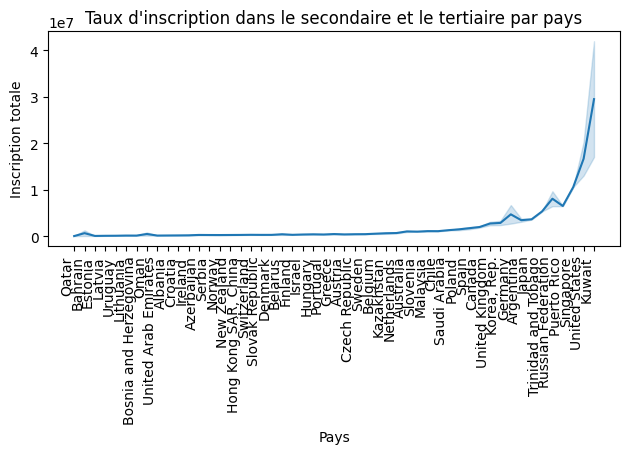

D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Programme\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


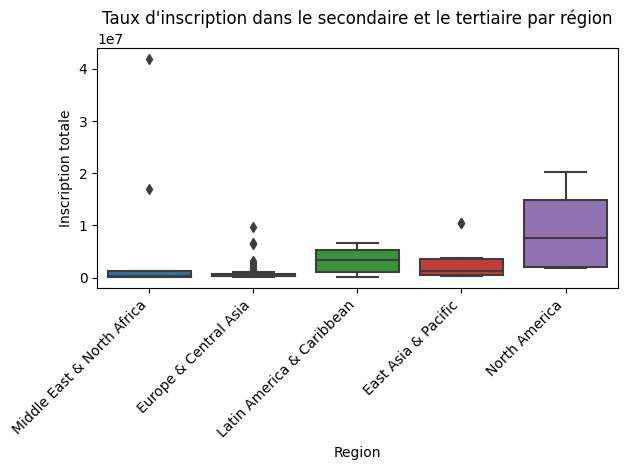

,count,mean,std,min,25%,50%,75%,max
2010s,51.0,4.487822e+06,9.869601e+06,54760.666667,529954.044271,877796.333333,3.190060e+06,5.894503e+07


Pays à supprimer de df_final:
0                    Albania
3                    Austria
4                 Azerbaijan
6                    Belarus
8     Bosnia and Herzegovina
11                   Croatia
12            Czech Republic
13                   Denmark
14                   Estonia
15                   Finland
18      Hong Kong SAR, China
19                   Hungary
20                   Ireland
21                    Israel
26                    Latvia
27                 Lithuania
30               New Zealand
31                    Norway
34                  Portugal
36                     Qatar
39                    Serbia
41           Slovak Republic
44                    Sweden
45               Switzerland
47      United Arab Emirates
50                   Uruguay
Name: Country Name, dtype: object
Nombre de pays restants dans df_final: 25
['Argentina' 'Australia' 'Belgium' 'Bahrain' 'Canada' 'Chile' 'Germany'
 'Spain' 'United Kingdom' 'Greece' 'Japan' 'Kazakhstan' 'Korea, Rep.

In [67]:
# Sélection des indicateurs d'éducation
indicateur_education = ['SE.TER.ENRL', 'UIS.E.3']
education_totale = df_final[df_final['Indicator Code'].isin(indicateur_education)]

# Représentation graphique
plt.figure()  
sns.lineplot(x='Country Name', y='2010s', data=education_totale.sort_values(by='2010s'))
plt.xlabel('Pays')
plt.ylabel('Inscription totale')
plt.title('Taux d\'inscription dans le secondaire et le tertiaire par pays')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Représentation graphique
plt.figure()  
sns.boxplot(x='Region', y='2010s', data=education_totale.sort_values(by='2010s'))
plt.xlabel('Region')
plt.ylabel('Inscription totale')
plt.title('Taux d\'inscription dans le secondaire et le tertiaire par région')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

education_totale = education_totale.groupby('Country Name')['2010s'].sum().reset_index()
display(education_totale.describe().T)

# Suppression des pays du df_final
pays_education_faible = education_totale[education_totale['2010s'] < 878000]['Country Name']
print("Pays à supprimer de df_final:")
print(pays_education_faible)
df_final = df_final[~df_final['Country Name'].isin(pays_education_faible)]

# Nombre de pays restants dans df_final
print("Nombre de pays restants dans df_final:", df_final['Country Name'].nunique())
print(df_final['Country Name'].unique())

### _2.5 - Croissance démographique_

In [68]:
# Sélectionner Indicator Code 'SP.POP.GROW'
population_growth = df_final[df_final['Indicator Code'] == 'SP.POP.GROW']
population_growth.info()
display(population_growth.describe().T)

# Afficher les pays qui vont être supprimés
pays_a_supprimer = population_growth[population_growth['2010s'] < 0]['Country Name']
print("Pays à supprimer avec une croissance démographique négative :")
print(pays_a_supprimer)

# Supprimer les lignes avec une croissance démographique négative
df_final = df_final[~df_final['Country Name'].isin(pays_a_supprimer)]

#Nombre de pays restants dans df_final
print("Nombre de pays restants dans df_final:", df_final['Country Name'].nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 16967 to 398127
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Code              25 non-null     object 
 1   Short Name                25 non-null     object 
 2   Table Name                25 non-null     object 
 3   Long Name                 25 non-null     object 
 4   Region                    25 non-null     object 
 5   Income Group              25 non-null     object 
 6   Latest population census  25 non-null     Int64  
 7   Country Name              25 non-null     object 
 8   Indicator Name            25 non-null     object 
 9   Indicator Code            25 non-null     object 
 10  2010                      25 non-null     float64
 11  2011                      25 non-null     float64
 12  2012                      25 non-null     float64
 13  2013                      25 non-null     float64
 14  2014     

,count,mean,std,min,25%,50%,75%,max
Latest population census,25.0,2010.52,0.653197,2009.0,2010.0,2011.0,2011.0,2012.0
2010,25.0,1.311949,1.714657,-0.50617,0.436079,0.836422,1.55549,6.161251
2011,25.0,1.203426,1.857364,-1.853715,0.207733,0.781677,1.429659,6.23921
2012,25.0,1.221172,1.835937,-1.209988,0.187728,0.726032,1.702435,6.788012
2013,25.0,1.10972,1.802584,-1.145931,0.212924,0.669534,1.441785,6.88211
2014,25.0,1.036443,1.681046,-1.633128,0.2177,0.743124,1.474288,6.50466
2015,25.0,1.011162,1.510037,-1.760677,0.192559,0.794968,1.391107,5.85617
2010s,25.0,1.148979,1.694487,-1.235406,0.15239,0.746455,1.538463,6.270466


Pays à supprimer avec une croissance démographique négative :
115922        Germany
163567         Greece
214877          Japan
313832         Poland
317497    Puerto Rico
Name: Country Name, dtype: object
Nombre de pays restants dans df_final: 20


### _2.6 Score d'attractivité_

In [69]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 15864 to 398353
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Code              120 non-null    object 
 1   Short Name                120 non-null    object 
 2   Table Name                120 non-null    object 
 3   Long Name                 120 non-null    object 
 4   Region                    120 non-null    object 
 5   Income Group              120 non-null    object 
 6   Latest population census  120 non-null    Int64  
 7   Country Name              120 non-null    object 
 8   Indicator Name            120 non-null    object 
 9   Indicator Code            120 non-null    object 
 10  2010                      120 non-null    float64
 11  2011                      120 non-null    float64
 12  2012                      120 non-null    float64
 13  2013                      120 non-null    float64
 14  2014    

In [70]:
##Supprimer les colonnes devenus inutiles
df_final.drop(['Country Code', 'Short Name', 'Table Name', 'Income Group', 'Latest population census', 
               '2010', '2011', '2012', '2013', '2014', '2015'], axis=1, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 15864 to 398353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Long Name       120 non-null    object 
 1   Region          120 non-null    object 
 2   Country Name    120 non-null    object 
 3   Indicator Name  120 non-null    object 
 4   Indicator Code  120 non-null    object 
 5   2010s           120 non-null    float64
dtypes: float64(1), object(5)
memory usage: 6.6+ KB


In [71]:
# Faire passer les valeurs Indicator Name en colonne
df_pivot = df_final.pivot(index='Country Name', columns='Indicator Name', values='2010s')
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Argentina to United States
Data columns (total 6 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Enrolment in tertiary education, all programmes, both sexes (number)  20 non-null     float64
 1   Enrolment in upper secondary education, both sexes (number)           20 non-null     float64
 2   GDP per capita, PPP (current international $)                         20 non-null     float64
 3   Internet users (per 100 people)                                       20 non-null     float64
 4   Population growth (annual %)                                          20 non-null     float64
 5   Population, total                                                     20 non-null     float64
dtypes: float64(6)
memory usage: 1.1+ KB


In [72]:
# Normaliser nos données
colonnes_normalisee = ['Internet users (per 100 people)', 'Enrolment in tertiary education, all programmes, both sexes (number)',
                        'Enrolment in upper secondary education, both sexes (number)', 'Population, total', 'GDP per capita, PPP (current international $)',
                        'Population growth (annual %)']

# Calculer le Z-score
df_pivot[colonnes_normalisee] = df_pivot[colonnes_normalisee].apply(zscore)

# Appliquer pondération
pondération = {
    'Internet users (per 100 people)': 0.3,
    'Enrolment in upper secondary education, both sexes (number)' : 0.2,
    'Enrolment in tertiary education, all programmes, both sexes (number)': 0.2,
    'Population, total': 0.1,
    'GDP per capita, PPP (current international $)': 0.1,
    'Population growth (annual %)': 0.1
}

df_pivot[colonnes_normalisee] = df_pivot[colonnes_normalisee].multiply(df_pivot[colonnes_normalisee].columns.map(pondération))

# Moyenner score par pays
df_pivot['Score_Mean'] = df_pivot[colonnes_normalisee].mean(axis=1)
df_pivot = df_pivot.sort_values(by='Score_Mean', ascending=False)
display(df_pivot['Score_Mean'])

Country Name
Kuwait                 0.294893
United States          0.194891
Singapore              0.120320
United Kingdom         0.053992
Netherlands            0.040201
Canada                 0.028151
Korea, Rep.            0.027948
Bahrain                0.008806
Australia              0.005927
Belgium               -0.008380
Russian Federation    -0.013630
Spain                 -0.048401
Oman                  -0.055841
Trinidad and Tobago   -0.063371
Slovenia              -0.071948
Saudi Arabia          -0.073804
Malaysia              -0.087947
Argentina             -0.094441
Kazakhstan            -0.127277
Chile                 -0.130088
Name: Score_Mean, dtype: float64

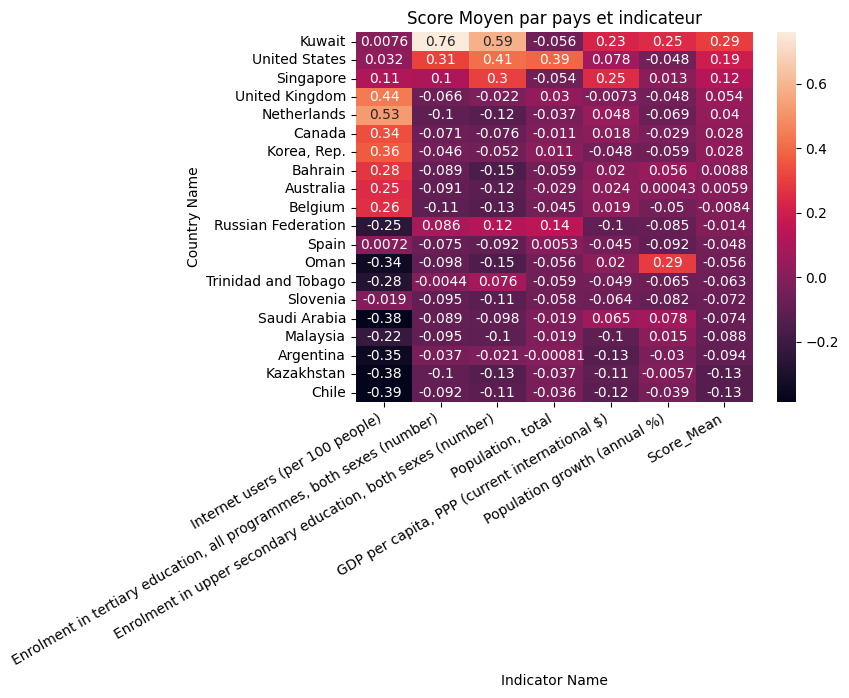

In [73]:
plt.figure()
sns.heatmap(df_pivot[colonnes_normalisee + ['Score_Mean']], annot=True)
plt.title('Score Moyen par pays et indicateur')
plt.xticks(rotation=30, ha='right')
plt.show()

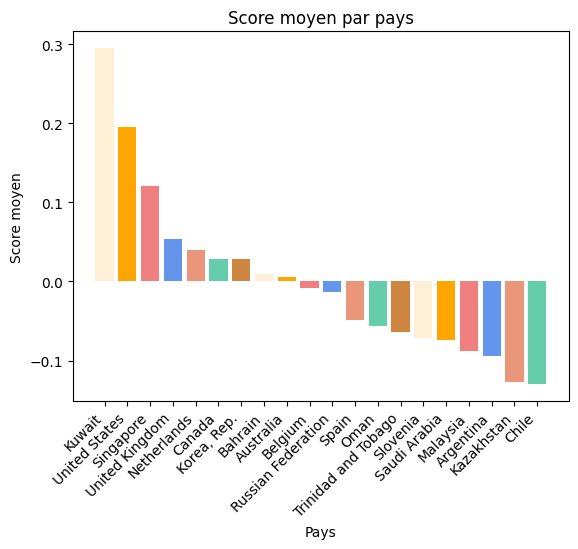

In [74]:
plt.bar(df_pivot.index, df_pivot['Score_Mean'], color=color)
plt.xlabel('Pays')
plt.ylabel('Score moyen')
plt.title('Score moyen par pays')
plt.xticks(rotation=45, ha='right')
plt.show()

### Conclusion

En résumé, cette analyse des données éducatives de la Banque Mondiale a permis de cibler 21 pays présentant un fort potentiel pour l'expansion internationale d'Academy. Les pays avec le plus fort potentiel sont :
1. Koweit
2. Etats-Unis
3. Singapoure
4. Royaume-Uni
5. Pays-Bas

La richesse des informations fournies par le jeu de données a été cruciale pour notre analyse. Les multiples dimensions, des caractéristiques géographiques aux données éducatives spécifique en passant par les données économiques,s, ont permis une exploration approfondie. La diversité des indicateurs disponibles a offert une vue complète des systèmes éducatifs mondiaux, permettant une sélection précise pour répondre à la problématique d'Academy.

Cependant, malgré sa richesse, le jeu de données présente quelques lacunes. Certains fichiers, tels que EdStatsCountry-Serie et EdStatsFootNote, ont été écartés en rais'uneeure structuration des éés donnencore trop frces. De plus, la présence de valeurs manquantes dans plusieurs fichiers a nécessité des exclusions, limitant parfois notre capacité à explorer certaines régions ou an.aust De plus, les indicateurs permettant d'évaluer les perspectives d'évolution sont trop lim.ive.

Malgré ces limitations, la robustesse des résultats obtenus atteste de la pertinence des données analysées. Ces résultats offrent à Academy des perspectives claires pour orienter ses décisions d'expansion internatinale.
